<a href="https://colab.research.google.com/github/eitanfass/hydrology-data-science/blob/main/oso%202014%20mudslide%20hydrological%20case%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hydrology Final exercise
  <br />

<img align="center" width="500" height="300" src="https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/newscms/2014_13/277796/140325-mudslide-combination-02.jpg">


In [ ]:
#adding all the librraries needed for the code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from calendar import month_abbr
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import urllib.request
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
def download_data(station_name, station_code):#function that downloads data for a spcefic metorological staition and saves it in a csv file
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
    # download daily data - uncomment the next 2 lines to make this work
    urllib.request.urlretrieve(url_daily + station_code + '.csv',
                                station_name + '_daily.csv')
    # download monthly data
    #urllib.request.urlretrieve(url_monthly + station_code + '.csv', station_name + '_monthly.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,24,28,30,32,34,36,38,40,42,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'oso WA, USA 1950–2010')

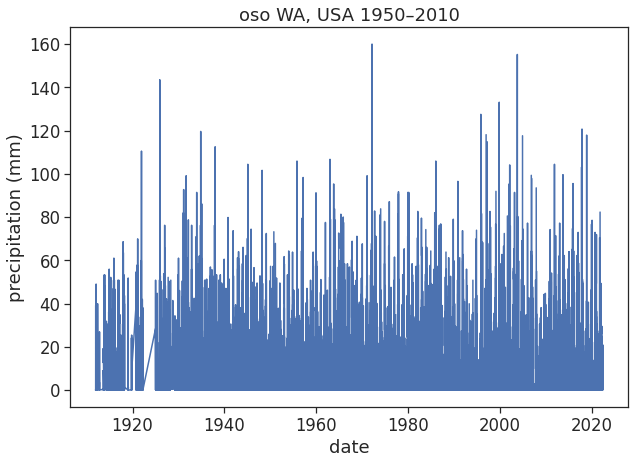

In [ ]:
# download_data('oso_usa', 'USC00450257')
# oso_per = pd.read_csv('oso_usa_daily.csv', sep=",")
# # make 'DATE' the dataframe index
# oso_per['DATE'] = pd.to_datetime(oso_per['DATE'])
# oso_per = oso_per.set_index('DATE')
# download=True
download=False
fig, (ax1) = plt.subplots(1, figsize=(10,7))
if download:
  download_data('oso_usa', 'USC00451992')
  oso_per_orginal = pd.read_csv('oso_usa_daily.csv', sep=",")
  oso_per_orginal.to_csv('/content/drive/MyDrive/hydrology/final assinment/oso_usa_daily.csv')
  # make 'DATE' the dataframe index
  oso_per_orginal['DATE'] = pd.to_datetime(oso_per_orginal['DATE'])
  oso_per_orginal = oso_per_orginal.set_index('DATE')
  oso_per_orginal['PRCP']/=10
  
else:
  oso_per_orginal = pd.read_csv('/content/drive/MyDrive/hydrology/final assinment/oso_usa_daily.csv', sep=",")
  oso_per_orginal['DATE'] = pd.to_datetime(oso_per_orginal['DATE'])
  oso_per_orginal = oso_per_orginal.set_index('DATE')
  oso_per_orginal['PRCP']/=10

# download_data('oso1_usa', 'USR0000WFIN')
# oso1_per_orginal = pd.read_csv('oso1_usa_daily.csv', sep=",")
# # make 'DATE' the dataframe index
# oso1_per_orginal['DATE'] = pd.to_datetime(oso1_per_orginal['DATE'])
# oso1_per_orginal = oso1_per_orginal.set_index('DATE')
# oso1_per_orginal['PRCP']/=10


ax1.plot(oso_per_orginal['PRCP'],color='b')
ax1.set_xlabel("date")
ax1.set_ylabel("precipitation (mm)")
ax1.set_title("oso WA, USA 1950–2010")

In [ ]:
oso_met_orginal = pd.read_csv('/content/drive/MyDrive/hydrology/final assinment/oso_metorological_data_1982.csv', sep=",")
met_units=oso_met_orginal['units'].dropna()

oso_met_orginal['DATE']=pd.to_datetime(oso_met_orginal['YEAR'] * 1000 + oso_met_orginal['DOY'], format='%Y%j')
oso_met_orginal = oso_met_orginal.set_index('DATE')
for i in met_units:
  print(i)

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Daily Data 
Dates (month/day/year): 01/01/1982 through 03/31/2021 
Location: Latitude  48.2827   Longitude -121.7148 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 671.57 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
GWETTOP               MERRA-2 Surface Soil Wetness (1) 
GWETROOT              MERRA-2 Root Zone Soil Wetness (1) 
GWETPROF              MERRA-2 Profile Soil Moisture (1) 
PS                    MERRA-2 Surface Pressure (kPa) 
WS2M                  MERRA-2 Wind Speed at 2 Meters (m/s) 
WS2M_MAX              MERRA-2 Wind Speed at 2 Meters Maximum (m/s) 
WS2M_MIN              MERRA-2 Wind Speed at 2 Meters Minimum (m/s) 
PRECTOTCORR           MERRA-2 Precipitation Corrected (mm/day) 
RH2M                  MERRA-2 Relative Humidity at 2 Meters (%) 
QV2M                  MERRA-2 Specific Humidity at 2 Meters (

Text(0.5, 1.0, 'oso WA, USA 1982-2022')

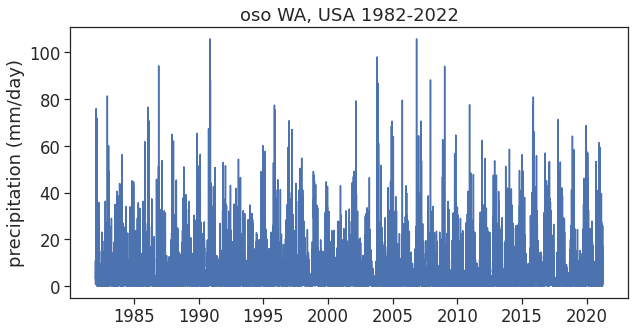

In [ ]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
ax1.plot(oso_met_orginal['PRECTOTCORR'],color='b')

ax1.set_ylabel("precipitation (mm/day)")

oso_met=oso_met_orginal
ax1.set_title("oso WA, USA 1982-2022")

In [ ]:
data_file = "/content/drive/MyDrive/hydrology/final assinment/oso_usa_1930.txt"
oso_dis_orginal = pd.read_csv(data_file,
                        header=31,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
oso_dis_orginal.columns = ['agency_cd', 'site_no','datetime','discharge','code1 _1']                       # rename df columns with headers columns
oso_dis_orginal['date_and_time'] = oso_dis_orginal['datetime'] # combine date+time into datetime
oso_dis_orginal['date_and_time'] = pd.to_datetime(oso_dis_orginal['date_and_time'])        # interpret datetime
oso_dis_orginal = oso_dis_orginal.set_index('date_and_time')                          # make datetime the index
oso_dis_orginal['discharge'] = oso_dis_orginal['discharge'].astype(float)
oso_dis_orginal['discharge'] = oso_dis_orginal['discharge'] * 0.0283168# convert ft^3/s to m^3/s


In [ ]:
oso_per=oso_per_orginal.loc['1941-01-01': '2022-03-31']
oso_dis=oso_dis_orginal.loc['1941-01-01': '2022-03-31']

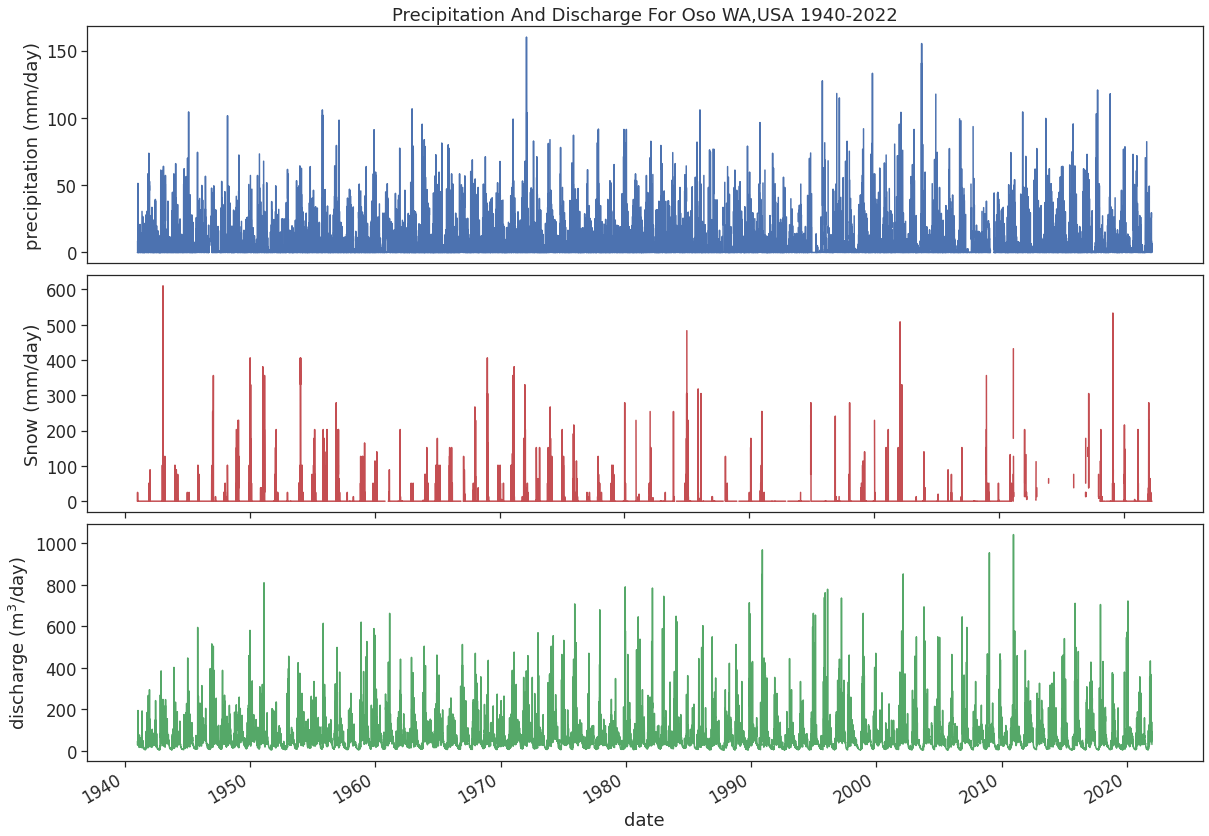

In [ ]:

fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(20,15))
fig.subplots_adjust(hspace=0.05)

ax1.plot(oso_per['PRCP'])# our time intervals is 15 min
ax2.plot(oso_per['SNOW'], color="r")
ax3.plot(oso_dis['discharge'], color="g")


ax1.set(xticks=[],
        ylabel=r"precipitation (mm/day)",
        title='Precipitation And Discharge For Oso WA,USA 1940-2022')
ax2.set(xlabel="date",
        ylabel=r"Snow (mm/day)",
        )
ax3.set(xlabel="date",
        ylabel=r"discharge (m$^3$/day)",
        )

plt.gcf().autofmt_xdate()  # makes slanted dates

,precipitation (mm),snow fall (mm)
month names,,
Jan,227.028049,291.134146
Feb,163.760976,171.792683
Mar,170.210976,108.853659
Apr,102.138272,5.913580
May,72.996296,0.160494
Jun,60.841975,0.000000
Jul,31.397531,0.000000
Aug,41.208642,0.000000
Sep,82.087654,0.000000


intra anual yearly total precipitation 1570.053086419753


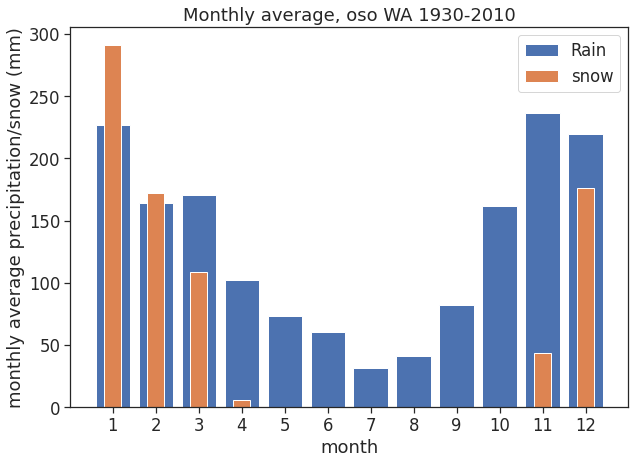

In [ ]:
# choose only the precipitation column
monthly_oso_per = oso_per['PRCP'].resample('M').sum()
monthly_oso_snow = oso_per['SNOW'].resample('M').sum()


# calculate monthly mean
monthly_mean_per = np.array([]) 
monthly_mean_snow = np.array([]) # empty array
month_numbers = np.arange(1,13)
month_numbers = np.arange(1,13)
month_names = [month_abbr[i] for i in month_numbers]

for m in month_numbers:      # cycle over months (1, 2, 3, etc)
    this_month_all_indices = (monthly_oso_per.index.month == m)       # indices in df_month belonging to month m
    this_month_mean_per = monthly_oso_per[this_month_all_indices].mean()
    this_month_mean_snow = monthly_oso_snow[this_month_all_indices].mean()  # this is the monthly mean
    monthly_mean_per = np.append(monthly_mean_per, this_month_mean_per)    # append
    monthly_mean_snow = np.append(monthly_mean_snow, this_month_mean_snow) 
df_oso_si_per = pd.DataFrame({  'month names':month_names,
                             'month number':month_numbers,
                           'precipitation (mm)':monthly_mean_per
                            })
df_oso_si_snow = pd.DataFrame({  'month names':month_names,
                             'month number':month_numbers,
                           'snow fall (mm)':monthly_mean_snow
                            })
fig, ax = plt.subplots(figsize=(10,7))


ax.bar(df_oso_si_per['month number'], df_oso_si_per['precipitation (mm)'],label='Rain')
ax.bar(df_oso_si_snow['month number'], df_oso_si_snow['snow fall (mm)'],label='snow',width=0.4)
ax.set(xlabel="month",
       ylabel="monthly average precipitation/snow (mm)",
       title="Monthly average, oso WA 1930-2010",
       xticks=np.arange(1,13));
ax.legend()
df_oso_si_per= df_oso_si_per.set_index('month names')

from IPython.display import display_html 

df_oso_si_snow=df_oso_si_snow.set_index(df_oso_si_per.index)
df1=pd.concat((df_oso_si_per['precipitation (mm)'],df_oso_si_snow['snow fall (mm)']),axis=1)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Oso, WA')
# df1_styler = df_oso_si_snow['monthly snow fall (mm)'].to_frame().style.set_table_attributes("style='display:inline'").set_caption('Oso, WA')

display_html(df1_styler._repr_html_(), raw=True)

all_year_avg_per = df_oso_si_per['precipitation (mm)'].sum()
print('intra anual yearly total precipitation',all_year_avg_per)

Text(0.5, 1.0, 'Monthly Precipitation For oso WA,USA 2014')

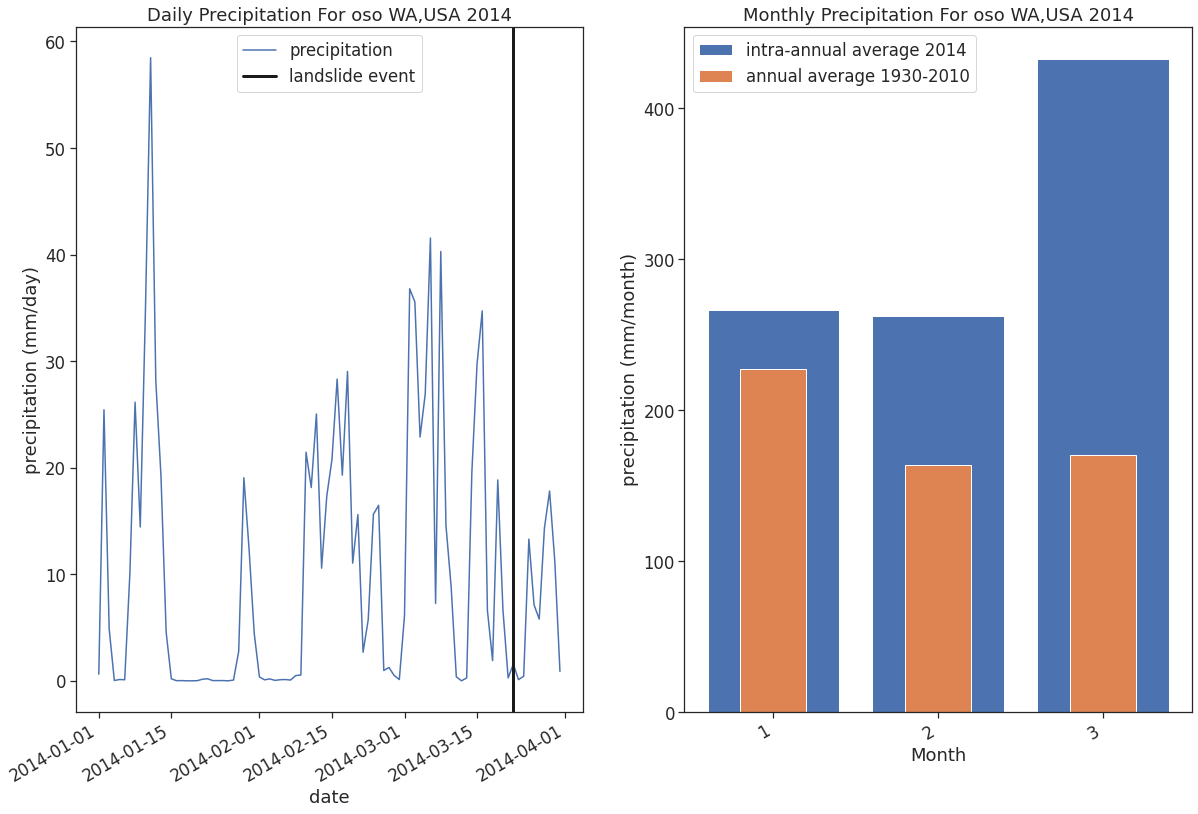

In [ ]:

fig, (ax1,ax2) = plt.subplots( 1,2, figsize=(20,14))
fig.subplots_adjust(hspace=0.05)
monthly=oso_met_orginal['PRECTOTCORR']['2014-01-01':'2014-03-31'].resample('MS').sum().to_frame()
monthly['month num']=[1,2,3]
ax1.plot(oso_met_orginal['PRECTOTCORR']['2014-01-01':'2014-03-31'],label='precipitation')
ax2.bar(monthly['month num'],monthly['PRECTOTCORR'],label='intra-annual average 2014')
ax1.axvline('2014-03-22',color='k',label='landslide event',lw=3)
ax1.set(xlabel='date',
        ylabel=r"precipitation (mm/day)",
        title='Daily Precipitation For oso WA,USA 2014')
plt.gcf().autofmt_xdate() 

ax2.set(xlabel='Month',
        xticks=[1,2,3],
        ylabel=r"precipitation (mm/month)")
ax2.bar(df_oso_si_per['month number']['Jan':'Mar'], df_oso_si_per['precipitation (mm)']['Jan':'Mar'],width=0.4,label='annual average 1930-2010')
ax2.legend()
ax1.legend()
plt.title('Monthly Precipitation For oso WA,USA 2014')

In [ ]:
def walsh_index(df):
    col=df.columns
    mi = df[col[1]]
    R = df[col[1]].sum()
    SI = np.sum(np.abs(mi - R/12)) / R
    return SI
oso_SI_per = walsh_index(df_oso_si_per)
oso_SI_snow=walsh_index(df_oso_si_snow)
print(f'Oso_WA_USA_SI\nRain SI= {oso_SI_per:0.2f}\nSnow SI= {oso_SI_snow:0.2f} ')

Oso_WA_USA_SI
Rain SI= 0.50
Snow SI= 0.46 


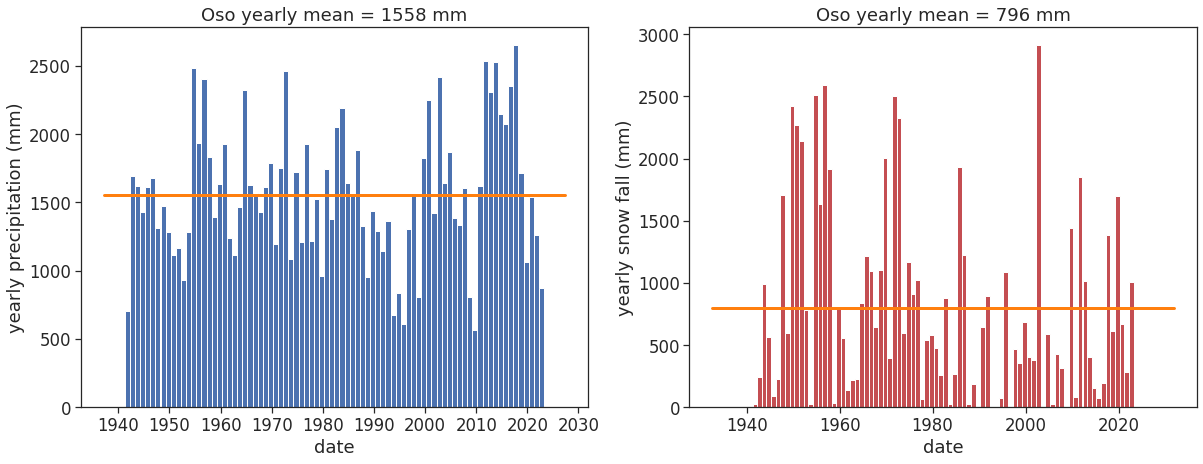

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,7))

# plot YEARLY precipitation
df_year = oso_per['PRCP']['1940-10-01':].resample('A-SEP').sum().to_frame()
ax1.bar(df_year.index, df_year['PRCP'],
       width=365, align='center', color="b")

# plot mean
rain_mean = df_year['PRCP']['1941-01-01':].mean()
ax1.plot(ax1.get_xlim(), [rain_mean]*2, linewidth=3, color="tab:orange")
ax1.set(xlabel="date",
       ylabel="yearly precipitation (mm)",
       title=f"Oso yearly mean = {rain_mean:.0f} mm");
df_year_snow = oso_per['SNOW']['1940-10-01':].resample('A-SEP').sum().to_frame()
ax2.bar(df_year_snow.index, df_year_snow['SNOW'],
       width=365, align='center', color="r")

# plot mean
snow_mean = df_year_snow['SNOW']['1941-01-01':].mean()
ax2.plot(ax1.get_xlim(), [snow_mean]*2, linewidth=3, color="tab:orange")
ax2.set(xlabel="date",
       ylabel="yearly snow fall (mm)",
       title=f"Oso yearly mean = {snow_mean:.0f} mm");
# save figure
#plt.savefig("hydrology_figures/beersheva_yearly_rainfall_1923_2016.png"

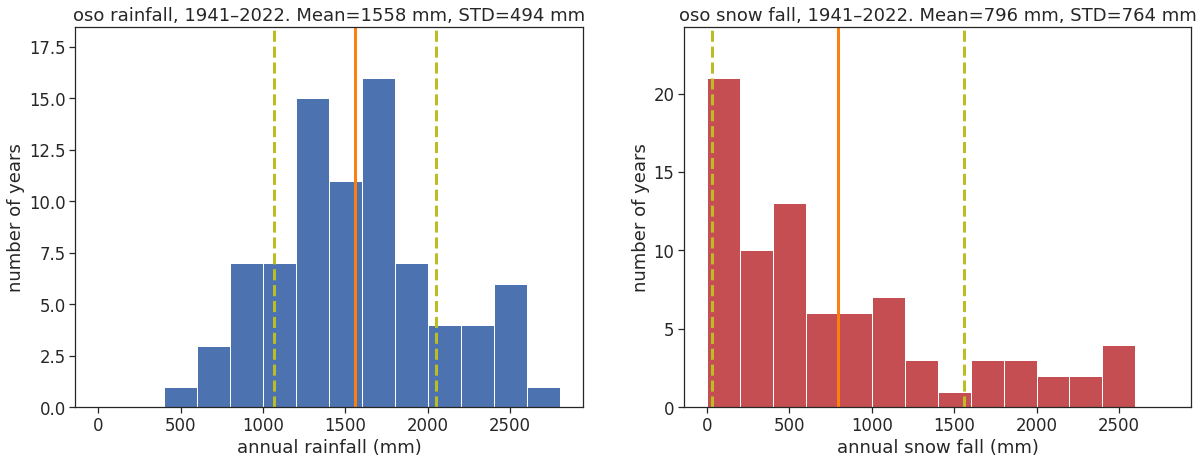

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

# calculate mean and standard deviation for oso
rain_mean = df_year['PRCP'].mean()
rain_std = df_year['PRCP'].std()

# plot histogram
b = np.arange(0, 3000, 200)  
ax1.hist(df_year['PRCP'], bins=b, color='b')

# plot vertical lines with mean, std, etc
ylim = np.array(ax1.get_ylim())
ylim[1] = ylim[1]*1.1
ax1.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax1.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax1.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax1.set(ylim=ylim,
       xlabel="annual rainfall (mm)",
       ylabel="number of years",
       title=f"oso rainfall, 1941–2022. Mean={rain_mean:.0f} mm, STD={rain_std:.0f} mm")
# ax1.text(50, 8, f"CV Elat = {rain_std/rain_mean:.2f}")


# calculate mean and standard deviation for estonia


rain_mean = df_year_snow['SNOW'].mean()
rain_std = df_year_snow['SNOW'].std()

# plot histogram
b = np.arange(0,3000, 200)  
ax2.hist(df_year_snow['SNOW'], bins=b, color='r')
ylim = np.array(ax2.get_ylim())
ylim[1] = ylim[1]*1.1
ax2.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax2.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax2.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax2.set(ylim=ylim,
       xlabel="annual snow fall (mm)",
       ylabel="number of years",
       title=f"oso snow fall, 1941–2022. Mean={rain_mean:.0f} mm, STD={rain_std:.0f} mm");
# ax2.text(50, 8, f"CV Kuressaare = {rain_std/rain_mean:.2f}")

6 weks sum= 621.75
3 weks sum= 361.26


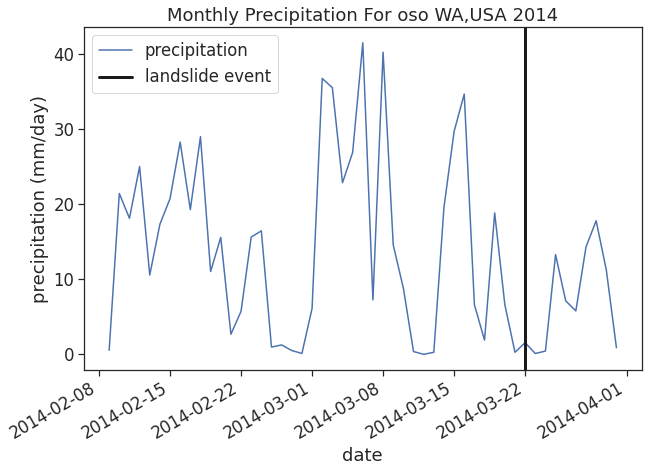

In [ ]:

fig, (ax1) = plt.subplots( 1 ,figsize=(10,7))
fig.subplots_adjust(hspace=0.05)

ax1.plot(oso_met_orginal['PRECTOTCORR']['2014-02-09':'2014-03-31'],label='precipitation')
ax1.axvline('2014-03-22',color='k',label='landslide event',lw=3)
ax1.set(xlabel='date',
        ylabel=r"precipitation (mm/day)",
        title='Daily Precipitation For oso WA,USA 2014')

plt.gcf().autofmt_xdate() 

ax1.legend()
plt.title('Monthly Precipitation For oso WA,USA 2014')
six_weeks_sum=oso_met_orginal['PRECTOTCORR']['2014-02-09':'2014-03-22'].sum()
three_weeks_sum=oso_met_orginal['PRECTOTCORR']['2014-03-01':'2014-03-22'].sum()
print('6 weks sum=',six_weeks_sum)
print('3 weks sum=',three_weeks_sum)

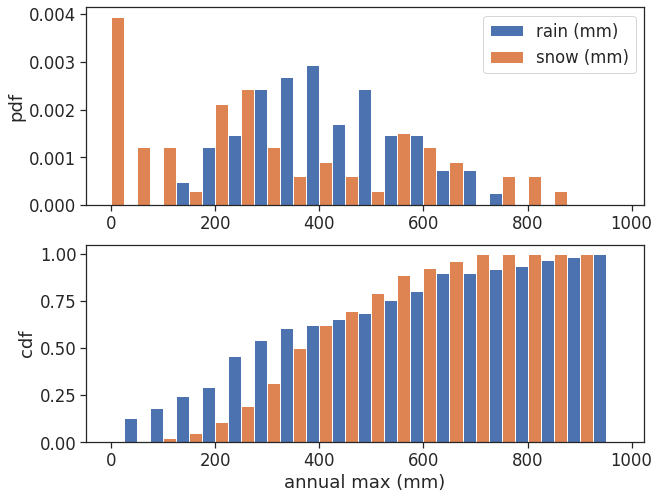

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
max_annual_per=(oso_per['PRCP'].resample('42d').sum().to_frame())
max_annual_snow=(oso_per['SNOW'].resample('42d').sum().to_frame())
max_annual_per=(max_annual_per['PRCP'].resample('A-SEP').max().to_frame())
max_annual_snow=(max_annual_snow['SNOW'].resample('A-SEP').max().to_frame())

max_annual_snow['SNOW']=max_annual_snow['SNOW'].dropna()
max_annual_per['PRCP']=max_annual_per['PRCP'].dropna()
h1=max_annual_per['PRCP'].values
h2=max_annual_snow['SNOW'].values

ax1.hist(h1, bins=np.arange(25,1000,50), density=True, label='rain (mm)',width=25)
ax1.hist(h2, bins=np.arange(0,1000,50), density=True, width=25,label='snow (mm)')
ax2.hist(h2, bins=np.arange(25,1000,50), cumulative=1, density=True,width=25)
ax2.hist(h1, bins=np.arange(0,1000,50), cumulative=1, density=True, width=25)
ax1.legend()
ax1.set(ylabel="pdf")
ax2.set(xlabel="annual max (mm)",
        ylabel="cdf",
        );

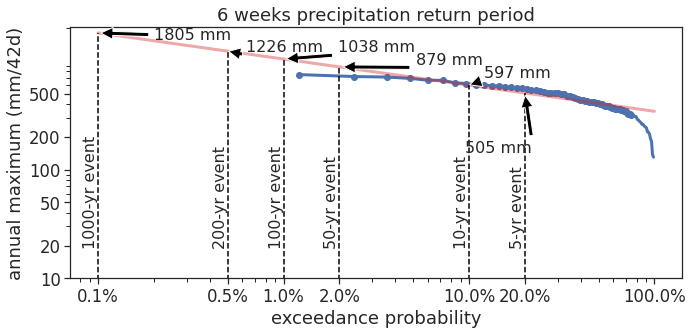

In [ ]:
max_annual_per = max_annual_per.sort_values(by=['PRCP'], ascending=True)#sorting rain events for the graph
max_annual_snow= max_annual_snow.sort_values(by=['SNOW'], ascending=True)

max_annual_per['rank'] = np.arange(1, len(max_annual_per) + 1)
max_annual_snow['rank'] = np.arange(1, len(max_annual_snow) + 1)


n_per = len(max_annual_per['rank'])
m_per = max_annual_per['rank']
Pm_per = m_per / (n_per+1)
Tr_per = 1 / (1 - Pm_per)
n_snow = len(max_annual_snow['rank'])
m_snow = max_annual_snow['rank']
Pm_snow = m_snow / (n_snow+1)
Tr_snow = 1 / (1 - Pm_snow)

depth_per = max_annual_per['PRCP'].values
exc_prob_per = (1-Pm_per).values
depth_per=np.array(pd.DataFrame(depth_per).dropna()[0])
depth_snow = max_annual_snow['SNOW'].values
exc_prob_snow = (1-Pm_snow).values
depth_snow=np.array(pd.DataFrame(depth_snow).dropna()[0])

exclude =20

depth_tofit_per = depth_per[exclude:]
exc_prob_tofit_per = exc_prob_per[exclude:]

exclude = 250

depth_tofit_snow = depth_snow[exclude:]
exc_prob_tofit_snow = exc_prob_snow[exclude:]



from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mtick

fig, (ax1) = plt.subplots(1,figsize=(10, 5))

ax1.plot(exc_prob_per, depth_per, lw=3, label="rain",color="b")
# ax2.plot(exc_prob_snow, depth_snow, lw=3, label="snow",color="r")
ax1.set(ylabel="annual maximum (mm/42d)",
       xlabel="exceedance probability",title='6 weeks precipitation return period')
# ax2.set(ylabel="annual maximum (mm/24h)",
#        xlabel="exceedance probability",title='snow fall')
ax1.set_xscale("log")
ax1.set_yscale("log")
# ax2.set_xscale("log")
# ax2.set_yscale("log")

ax1.plot(exc_prob_tofit_per, depth_tofit_per, 'o')
# ax2.plot(exc_prob_tofit_snow, depth_tofit_snow, 'o')

exc_prob_tofit_log_per = np.log(exc_prob_tofit_per)
depth_tofit_log_per = np.log(depth_tofit_per)

slope_per, intercept_per = np.polyfit(exc_prob_tofit_log_per, depth_tofit_log_per, 1)
exc_prob_tofit_log_snow = np.log(exc_prob_tofit_snow)
depth_tofit_log_snow = np.log(depth_tofit_snow)

# slope_snow, intercept_snow = np.polyfit(exc_prob_tofit_log_snow[922:], depth_tofit_log_snow[922:], 1)

prob = [1e-3,1-1e-3]


def equationp(p):#,slope,intercept):
    return np.exp(slope_per*np.log(p) + intercept_per)
# def equations(p):#,slope,intercept):
#     return np.exp(slope_snow*np.log(p) + intercept_snow)

ax1.plot(prob, equationp(prob), lw=3, color="tab:red", alpha=0.4)
# ax2.plot(prob, equations(prob), lw=3, color="tab:green", alpha=0.4)

one_in_x_years = np.array([5, 10, 50, 100, 200, 1000])

for y in one_in_x_years:
    ax1.plot([1/y]*2, [0, equationp(1/y)], color="black", ls="--")
    ax1.text(1/y, 20, f"{y}-yr event", rotation=90, ha="right", fontsize=16)
# for z in one_in_x_years:
#     ax2.plot([1/z]*2, [0, equations(1/z)], color="black", ls="--")
#     ax2.text(1/z, 30, f"{z/12}-yr event", rotation=90, ha="right", fontsize=16)

ax1.set_xticks([0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 1.0])
ax1.set_yticks([10, 20, 50, 100, 200, 500])
# ax2.set_xticks([0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 1.0])
# ax2.set_yticks([10, 20, 50, 100, 200, 500])

ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.1f}%'.format(y*100)))
# ax2.yaxis.set_major_formatter(ScalarFormatter())
# ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.1f}%'.format(y*100)))

ax1.annotate(f"{equationp(1/5):.0f} mm",
            xy=(1/5, equationp(1/5)), xycoords='data',
             xytext=(0.7, 0.5), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/5):.0f} mm",
#             xy=(1/5, equations(1/5)), xycoords='data',
#              xytext=(0.8, 0.6), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/10):.0f} mm",
            xy=(1/10, equationp(1/10)), xycoords='data',
             xytext=(0.73, 0.8), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/10):.0f} mm",
#             xy=(1/10, equations(1/10)), xycoords='data',
#              xytext=(0.7, 0.7), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/50):.0f} mm",
            xy=(1/50, equationp(1/50)), xycoords='data',
             xytext=(0.62, 0.85), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/50):.0f} mm",
#             xy=(1/50, equations(1/50)), xycoords='data',
#              xytext=(0.6, 0.87), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/100):.0f} mm",
            xy=(1/100, equationp(1/100)), xycoords='data',
             xytext=(0.5, 0.9), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/100):.0f} mm",
#             xy=(1/100, equations(1/100)), xycoords='data',
#              xytext=(0.5, 0.9), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/200):.0f} mm",
            xy=(1/200, equationp(1/200)), xycoords='data',
             xytext=(0.35, 0.9), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/200):.0f} mm",
#             xy=(1/200, equations(1/200)), xycoords='data',
#              xytext=(0.35, 0.9), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/1000):.0f} mm",
            xy=(1/1000, equationp(1/1000)), xycoords='data',
             xytext=(0.2, 0.95), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/1000):.0f} mm",
#             xy=(1/1000, equations(1/1000)), xycoords='data',
#              xytext=(0.2, 0.95), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
fig.tight_layout()

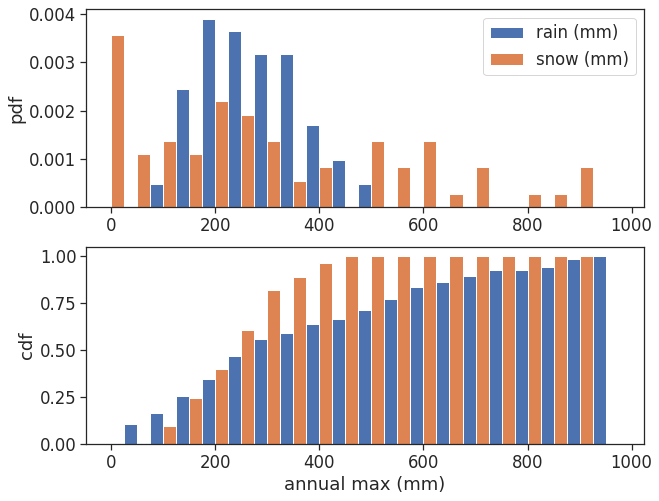

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
max_annual_per=(oso_per['PRCP'].resample('21d').sum().to_frame())
max_annual_snow=(oso_per['SNOW'].resample('21d').sum().to_frame())
max_annual_per=(max_annual_per['PRCP'].resample('A-SEP').max().to_frame())
max_annual_snow=(max_annual_snow['SNOW'].resample('A-SEP').max().to_frame())

max_annual_snow['SNOW']=max_annual_snow['SNOW'].dropna()
max_annual_per['PRCP']=max_annual_per['PRCP'].dropna()
h1=max_annual_per['PRCP'].values
h2=max_annual_snow['SNOW'].values

ax1.hist(h1, bins=np.arange(25,1000,50), density=True, label='rain (mm)',width=25)
ax1.hist(h2, bins=np.arange(0,1000,50), density=True, width=25,label='snow (mm)')
ax2.hist(h2, bins=np.arange(25,1000,50), cumulative=1, density=True,width=25)
ax2.hist(h1, bins=np.arange(0,1000,50), cumulative=1, density=True, width=25)
ax1.legend()
ax1.set(ylabel="pdf")
ax2.set(xlabel="annual max (mm)",
        ylabel="cdf",
        );

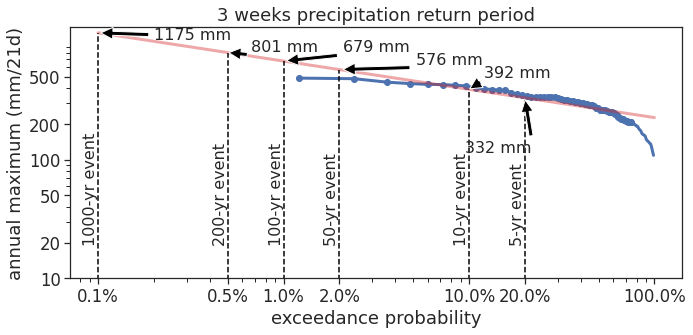

In [ ]:
max_annual_per = max_annual_per.sort_values(by=['PRCP'], ascending=True)#sorting rain events for the graph
max_annual_snow= max_annual_snow.sort_values(by=['SNOW'], ascending=True)

max_annual_per['rank'] = np.arange(1, len(max_annual_per) + 1)
max_annual_snow['rank'] = np.arange(1, len(max_annual_snow) + 1)


n_per = len(max_annual_per['rank'])
m_per = max_annual_per['rank']
Pm_per = m_per / (n_per+1)
Tr_per = 1 / (1 - Pm_per)
n_snow = len(max_annual_snow['rank'])
m_snow = max_annual_snow['rank']
Pm_snow = m_snow / (n_snow+1)
Tr_snow = 1 / (1 - Pm_snow)

depth_per = max_annual_per['PRCP'].values
exc_prob_per = (1-Pm_per).values
depth_per=np.array(pd.DataFrame(depth_per).dropna()[0])
depth_snow = max_annual_snow['SNOW'].values
exc_prob_snow = (1-Pm_snow).values
depth_snow=np.array(pd.DataFrame(depth_snow).dropna()[0])

exclude =20

depth_tofit_per = depth_per[exclude:]
exc_prob_tofit_per = exc_prob_per[exclude:]

exclude = 250

depth_tofit_snow = depth_snow[exclude:]
exc_prob_tofit_snow = exc_prob_snow[exclude:]



from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mtick

fig, (ax1) = plt.subplots(1,figsize=(10, 5))

ax1.plot(exc_prob_per, depth_per, lw=3, label="rain",color="b")
# ax2.plot(exc_prob_snow, depth_snow, lw=3, label="snow",color="r")
ax1.set(ylabel="annual maximum (mm/21d)",
       xlabel="exceedance probability",title='3 weeks precipitation return period')
# ax2.set(ylabel="annual maximum (mm/24h)",
#        xlabel="exceedance probability",title='snow fall')
ax1.set_xscale("log")
ax1.set_yscale("log")
# ax2.set_xscale("log")
# ax2.set_yscale("log")

ax1.plot(exc_prob_tofit_per, depth_tofit_per, 'o')
# ax2.plot(exc_prob_tofit_snow, depth_tofit_snow, 'o')

exc_prob_tofit_log_per = np.log(exc_prob_tofit_per)
depth_tofit_log_per = np.log(depth_tofit_per)

slope_per, intercept_per = np.polyfit(exc_prob_tofit_log_per, depth_tofit_log_per, 1)
exc_prob_tofit_log_snow = np.log(exc_prob_tofit_snow)
depth_tofit_log_snow = np.log(depth_tofit_snow)

# slope_snow, intercept_snow = np.polyfit(exc_prob_tofit_log_snow[922:], depth_tofit_log_snow[922:], 1)

prob = [1e-3,1-1e-3]


def equationp(p):#,slope,intercept):
    return np.exp(slope_per*np.log(p) + intercept_per)
# def equations(p):#,slope,intercept):
#     return np.exp(slope_snow*np.log(p) + intercept_snow)

ax1.plot(prob, equationp(prob), lw=3, color="tab:red", alpha=0.4)
# ax2.plot(prob, equations(prob), lw=3, color="tab:green", alpha=0.4)

one_in_x_years = np.array([5, 10, 50, 100, 200, 1000])

for y in one_in_x_years:
    ax1.plot([1/y]*2, [0, equationp(1/y)], color="black", ls="--")
    ax1.text(1/y, 20, f"{y}-yr event", rotation=90, ha="right", fontsize=16)
# for z in one_in_x_years:
#     ax2.plot([1/z]*2, [0, equations(1/z)], color="black", ls="--")
#     ax2.text(1/z, 30, f"{z/12}-yr event", rotation=90, ha="right", fontsize=16)

ax1.set_xticks([0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 1.0])
ax1.set_yticks([10, 20, 50, 100, 200, 500])
# ax2.set_xticks([0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 1.0])
# ax2.set_yticks([10, 20, 50, 100, 200, 500])

ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.1f}%'.format(y*100)))
# ax2.yaxis.set_major_formatter(ScalarFormatter())
# ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.1f}%'.format(y*100)))

ax1.annotate(f"{equationp(1/5):.0f} mm",
            xy=(1/5, equationp(1/5)), xycoords='data',
             xytext=(0.7, 0.5), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/5):.0f} mm",
#             xy=(1/5, equations(1/5)), xycoords='data',
#              xytext=(0.8, 0.6), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/10):.0f} mm",
            xy=(1/10, equationp(1/10)), xycoords='data',
             xytext=(0.73, 0.8), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/10):.0f} mm",
#             xy=(1/10, equations(1/10)), xycoords='data',
#              xytext=(0.7, 0.7), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/50):.0f} mm",
            xy=(1/50, equationp(1/50)), xycoords='data',
             xytext=(0.62, 0.85), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/50):.0f} mm",
#             xy=(1/50, equations(1/50)), xycoords='data',
#              xytext=(0.6, 0.87), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/100):.0f} mm",
            xy=(1/100, equationp(1/100)), xycoords='data',
             xytext=(0.5, 0.9), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/100):.0f} mm",
#             xy=(1/100, equations(1/100)), xycoords='data',
#              xytext=(0.5, 0.9), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/200):.0f} mm",
            xy=(1/200, equationp(1/200)), xycoords='data',
             xytext=(0.35, 0.9), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/200):.0f} mm",
#             xy=(1/200, equations(1/200)), xycoords='data',
#              xytext=(0.35, 0.9), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equationp(1/1000):.0f} mm",
            xy=(1/1000, equationp(1/1000)), xycoords='data',
             xytext=(0.2, 0.95), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
# ax2.annotate(f"{equations(1/1000):.0f} mm",
#             xy=(1/1000, equations(1/1000)), xycoords='data',
#              xytext=(0.2, 0.95), textcoords='axes fraction',
#              fontsize=16, horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))
fig.tight_layout()

intra anual yearly total discharge 1570.053086419753


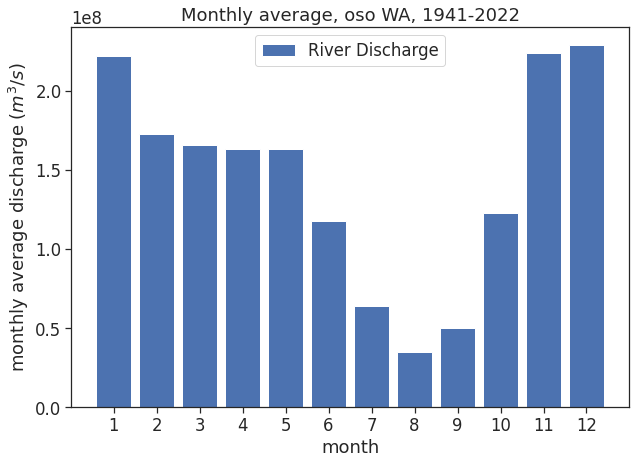

In [ ]:
# choose only the precipitation column
monthly_oso_dis = oso_dis['discharge'].resample('M').sum()*24*60*60

# calculate monthly mean
monthly_mean_dis = np.array([]) # empty array
month_numbers = np.arange(1,13)
month_names = [month_abbr[i] for i in month_numbers]

for m in month_numbers:      # cycle over months (1, 2, 3, etc)
    this_month_all_indices = (monthly_oso_dis.index.month == m)       # indices in df_month belonging to month m
    this_month_mean_dis = monthly_oso_dis[this_month_all_indices].mean()# this is the monthly mean
    monthly_mean_dis = np.append(monthly_mean_dis, this_month_mean_dis)    # append
df_oso_si_dis = pd.DataFrame({  'month names':month_names,
                             'month number':month_numbers,
                           'discharge':monthly_mean_dis
                            })
fig, ax = plt.subplots(figsize=(10,7))


ax.bar(df_oso_si_dis['month number'], df_oso_si_dis['discharge'],label='River Discharge')

ax.set(xlabel="month",
       ylabel="monthly average discharge ($m^3$$/s$)",
       title="Monthly average, oso WA, 1941-2022",
       xticks=np.arange(1,13));
ax.legend()

all_year_avg_dis = df_oso_si_dis['discharge'].sum()
print('intra anual yearly total discharge',all_year_avg_per)

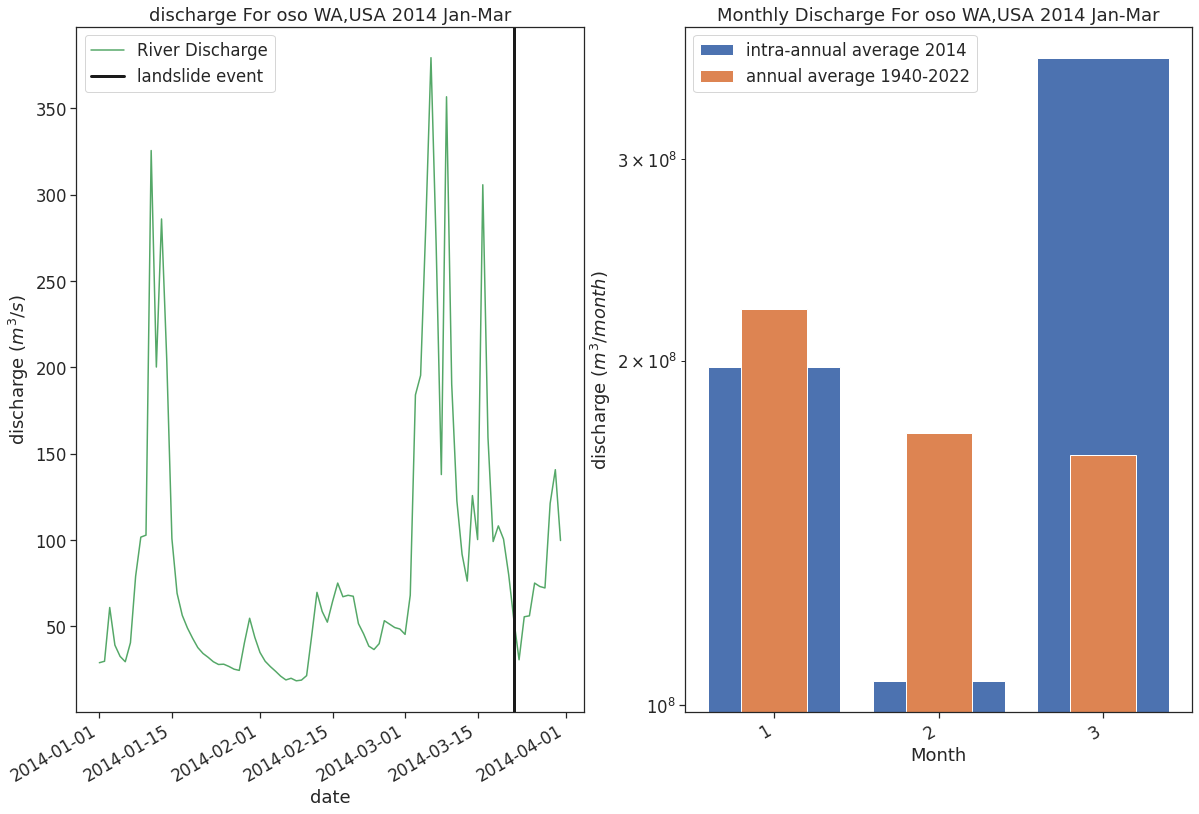

In [ ]:
fig, (ax1,ax2) = plt.subplots( 1,2, figsize=(20,14))
fig.subplots_adjust(hspace=0.05)
start='2014-01-01'
end='2014-03-31'
landslide='2014-03-22'

monthly=oso_dis['discharge'][start:end].resample('MS').sum().to_frame()*60*60*24
monthly['month num']=[1,2,3]

ax2.bar(monthly['month num'],monthly['discharge'],label='intra-annual average 2014')

plt.gcf().autofmt_xdate() 

ax2.set(xlabel='Month',yscale="log",
        xticks=[1,2,3],
        ylabel=r"discharge ($m^3$$/month$)")
ax2.bar(df_oso_si_dis['month number'][0:3], df_oso_si_dis['discharge'][0:3],width=.4,label='annual average 1940-2022')
ax2.legend()

plt.title('Monthly Discharge For oso WA,USA 2014 Jan-Mar')
ax1.plot(oso_dis['discharge'][start:end], color="g",label='River Discharge')
ax1.axvline(landslide,color='k',label='landslide event',lw=3)
ax1.set(xlabel='date',
        ylabel="discharge ($m^3$$/s$)",
        title='discharge For oso WA,USA 2014 Jan-Mar')
plt.gcf().autofmt_xdate()  # makes slanted dates

ax1.legend()

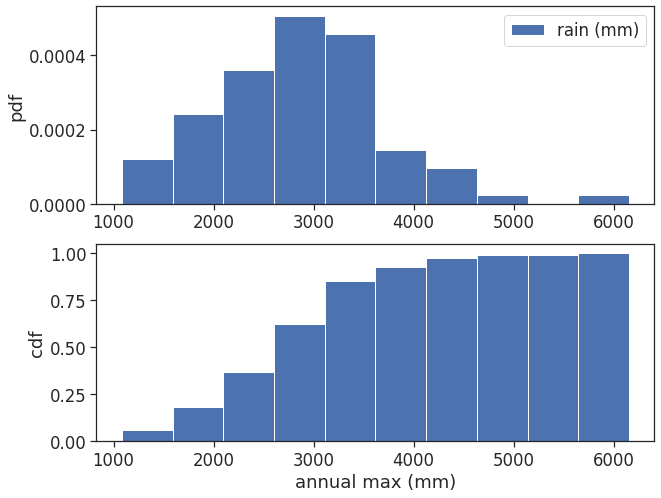

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
max_annual_dis=(oso_dis['discharge'].resample('21d').sum().to_frame())
max_annual_dis=(max_annual_dis['discharge'].resample('A-SEP').max().to_frame())

max_annual_dis['discharge']=max_annual_dis['discharge'].dropna()
h1=max_annual_dis['discharge'].values


ax1.hist(h1, density=True, label='rain (mm)')
ax2.hist(h1,  cumulative=1, density=True)
ax1.legend()
ax1.set(ylabel="pdf")
ax2.set(xlabel="annual max (mm)",
        ylabel="cdf",
        );

3.1e+08


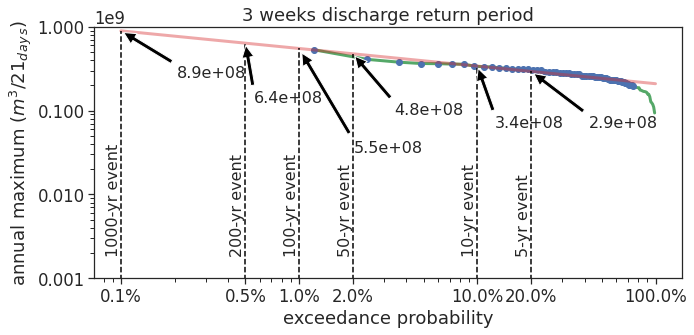

In [ ]:
max_annual_dis = max_annual_dis.sort_values(by=['discharge'], ascending=True)#sorting rain events for the graph

max_annual_dis['rank'] = np.arange(1, len(max_annual_dis) + 1)

n_dis = len(max_annual_dis['rank'])
m_dis = max_annual_dis['rank']
Pm_dis = m_dis / (n_dis+1)
Tr_dis = 1 / (1 - Pm_dis)

depth_dis = max_annual_dis['discharge'].values
exc_prob_dis = (1-Pm_dis).values
depth_dis=np.array(pd.DataFrame(depth_dis).dropna()[0])

exclude =20

depth_tofit_dis = depth_dis[exclude:]
exc_prob_tofit_dis = exc_prob_dis[exclude:]



from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mtick

fig, (ax1) = plt.subplots(1,figsize=(10, 5))

ax1.plot(exc_prob_dis, depth_dis*24*60*60, lw=3, label="discharge",color="g")

ax1.set(ylabel="annual maximum ($m^3$$/21_d$$_a$$_y$$_s$)",
       xlabel="exceedance probability",title='3 weeks discharge return period')

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.plot(exc_prob_tofit_dis, depth_tofit_dis*60*60*24, 'o')

exc_prob_tofit_log_dis = np.log(exc_prob_tofit_dis)
depth_tofit_log_dis = np.log(depth_tofit_dis*60*60*24)

slope_dis, intercept_dis = np.polyfit(exc_prob_tofit_log_dis, depth_tofit_log_dis, 1)

prob = [1e-3,1-1e-3]


def equationp(p):
    return np.exp(slope_dis*np.log(p) + intercept_dis)

ax1.plot(prob, equationp(prob), lw=3, color="tab:red", alpha=0.4)

one_in_x_years = np.array([5, 10, 50, 100, 200, 1000])

for y in one_in_x_years:
    ax1.plot([1/y]*2, [0, equationp(1/y)], color="black", ls="--")
    ax1.text(1/y, 2e6, f"{y}-yr event", rotation=90, ha="right", fontsize=16)

ax1.set_xticks([0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 1.0])
ax1.set_yticks([ 1e6,1e7,1e8,1e9])

ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.1f}%'.format(y*100)))

ax1.annotate(f'{equationp(1/5):.1e}',
            xy=(1/5, equationp(1/5)), xycoords='data',
             xytext=(0.9, 0.6), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

ax1.annotate(f'{equationp(1/10):.1e}',
            xy=(1/10, equationp(1/10)), xycoords='data',
             xytext=(0.74, 0.6), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

ax1.annotate(f'{equationp(1/50):.1e}',
            xy=(1/50, equationp(1/50)), xycoords='data',
             xytext=(0.57, 0.65), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

ax1.annotate(f'{equationp(1/100):.1e}',
            xy=(1/100, equationp(1/100)), xycoords='data',
             xytext=(0.5, 0.5), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

ax1.annotate(f'{equationp(1/200):.1e}',
            xy=(1/200, equationp(1/200)), xycoords='data',
             xytext=(0.33, 0.7), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

ax1.annotate(f'{equationp(1/1000):.1e}',
            xy=(1/1000, equationp(1/1000)), xycoords='data',
             xytext=(0.2, 0.8), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

fig.tight_layout()
sum=oso_dis['discharge']['2014-03-01':landslide].sum()*60*60*24
print(f'{sum:.1e}')

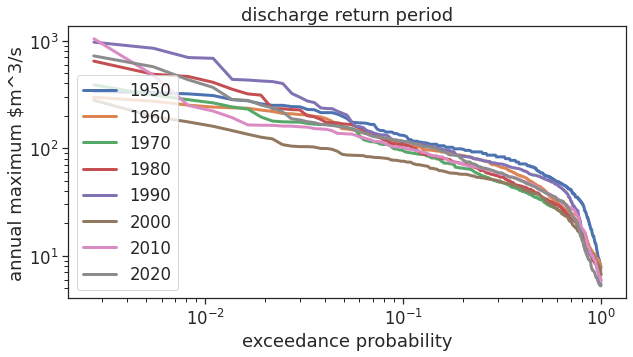

In [ ]:

fig, (ax1) = plt.subplots(1,figsize=(10, 5))

years=['1950','1960','1970','1980','1990','2000','2010','2020']
h={}
exc_prob_per={}
exc_prob_tofit_per={}
for i in years:
  max_annual_per=pd.DataFrame(oso_dis['discharge'][i])
  
  max_annual_per=pd.DataFrame(max_annual_per.sort_values(by=['discharge'], ascending=True).values,columns=['discharge'])#sorting rain events for the graph

  max_annual_per['rank'] = np.arange(1, len(max_annual_per) + 1)
  n_per = len(max_annual_per['rank'])
  m_per = max_annual_per['rank']
  Pm_per = m_per / (n_per+1)
  Tr_per = 1 / (1 - Pm_per)


  depth_per = max_annual_per['discharge']
  exc_prob_per[i] = (1-Pm_per).values
 


  exclude =0

  depth_tofit_per = depth_per[exclude:]
  exc_prob_tofit_per[i] = exc_prob_per[i][exclude:]
  ax1.plot(exc_prob_per[i], depth_per, lw=3, label=i)

ax1.legend()
ax1.set(ylabel="annual maximum $m^3/s",
       xlabel="exceedance probability",title='discharge return period')

ax1.set_xscale("log")
ax1.set_yscale("log")



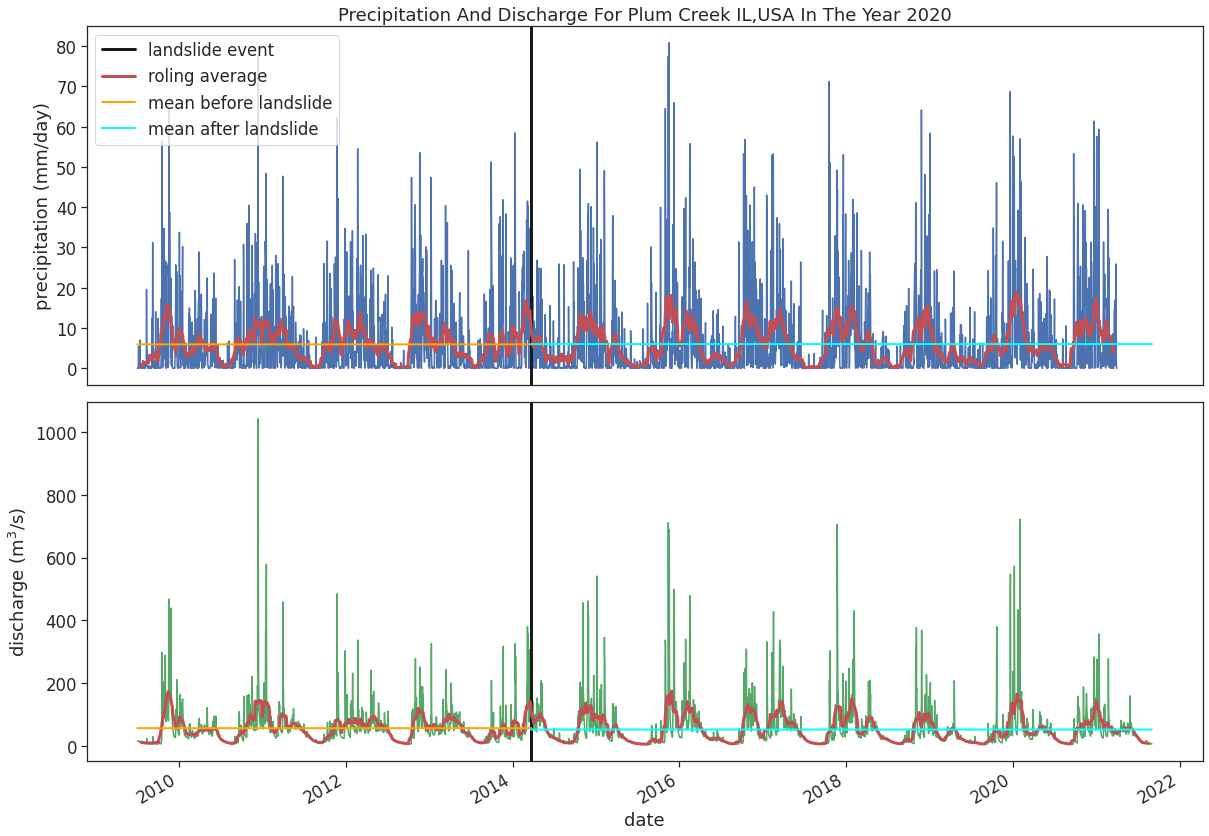

In [ ]:
fig, (ax1,ax3) = plt.subplots(2, 1, figsize=(20,15))
fig.subplots_adjust(hspace=0.05)
start='2009-07-01'
end='2021-09-01'
landslide='2014-03-22'
ax1.plot(oso_met_orginal['PRECTOTCORR'][start:end])# our time intervals is 15 min
ax3.plot(oso_dis['discharge'][start:end], color="g")


roling_avg=oso_met_orginal['PRECTOTCORR'][start:end].dropna()
mean=roling_avg.mean()
roling_avg=roling_avg.rolling(30, center=True).mean()

mean_per_before=oso_met_orginal['PRECTOTCORR'][start:landslide].mean()
mean_per_after=oso_met_orginal['PRECTOTCORR'][landslide:end].mean()


roling_dis=oso_dis['discharge'][start:end].dropna()


mean_dis_before=oso_dis['discharge'][start:landslide].mean()
mean_dis_after=oso_dis['discharge'][landslide:end].mean()
roling_dis=roling_dis.rolling(30, center=True).mean()

ax1.set(xticks=[],
        ylabel=r"precipitation (mm/day)",
        title='Precipitation And Discharge For Plum Creek IL,USA In The Year 2020')
ax3.set(xlabel="date",
        ylabel=r"discharge (m$^3$/s)",
        )
ax3.axvline('2014-03-22',color='k',lw=3)
ax1.axvline('2014-03-22',color='k',label='landslide event',lw=3)
ax1.plot(roling_avg, c='r',lw=3,label='roling average')
ax3.plot(roling_dis, c='r',lw=3)
ax1.plot(oso_dis['discharge'][start:landslide]*0+mean_per_before,c='orange',lw=2, label='mean before landslide')
ax1.plot(oso_dis['discharge'][landslide:end]*0+mean_per_after,c='cyan',lw=2,label='mean after landslide')

ax3.plot(oso_dis['discharge'][start:landslide]*0+mean_dis_before,c='orange',lw=2)
ax3.plot(oso_dis['discharge'][landslide:end]*0+mean_dis_after,c='cyan',lw=2)
plt.gcf().autofmt_xdate()  # makes slanted dates

ax1.legend()

56.28313448342989 51.97756254906284
5.939159907300116 6.012138683287884


[None,
 (1, 1042.05824),
 Text(0, 0.5, 'discharge (m$^3$/s)'),
 Text(0.5, 0, 'date')]

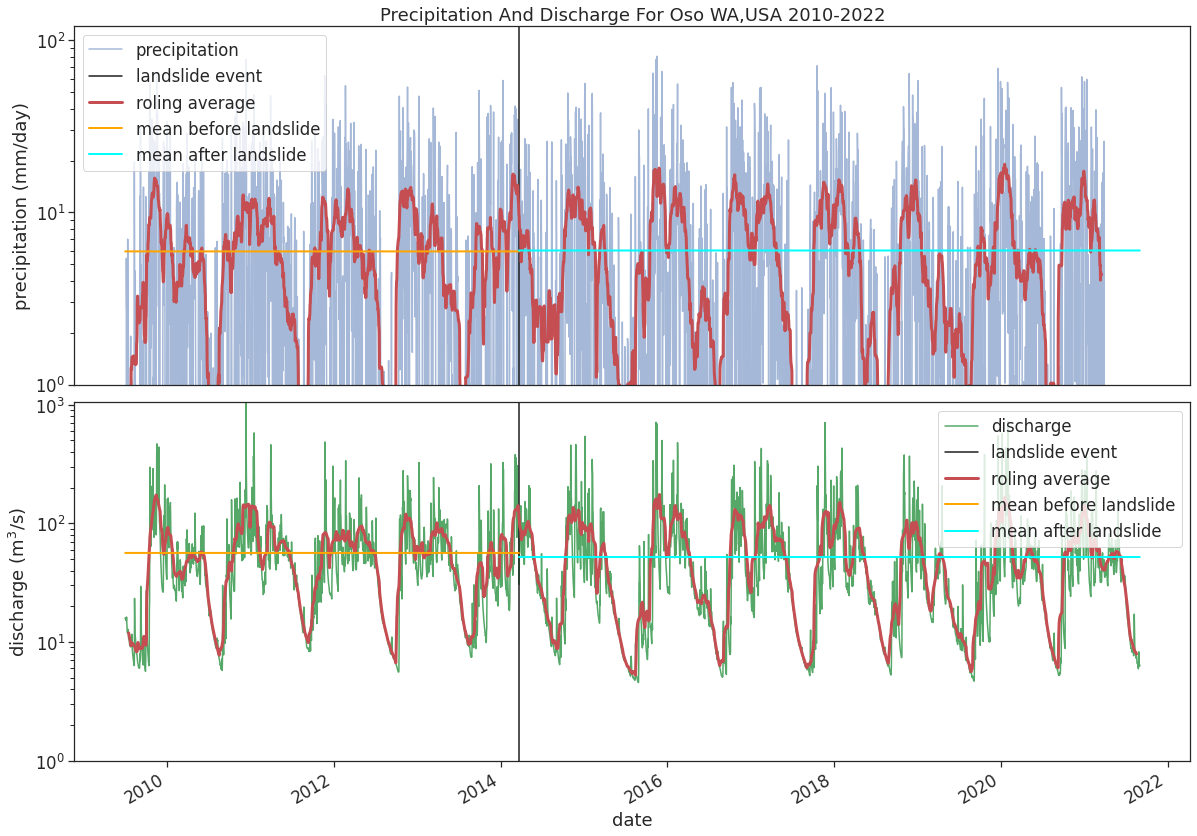

In [ ]:
fig, (ax1,ax3) = plt.subplots(2, 1, figsize=(20,15))
fig.subplots_adjust(hspace=0.05)

start='2009-07-01'
end='2021-09-01'

ax1.plot(oso_met_orginal['PRECTOTCORR'][start:end],alpha=0.5,label='precipitation')# our time intervals is 15 min
ax3.plot(oso_dis['discharge'][start:end], color="g",label='discharge')
ax3.axvline('2014-03-22',color='k',label='landslide event')
ax1.axvline('2014-03-22',color='k',label='landslide event')
ax1.plot(roling_avg, c='r',lw=3,label='roling average')
ax3.plot(roling_dis, c='r',lw=3,label='roling average')
ax1.plot(oso_dis['discharge'][start:landslide]*0+mean_per_before,c='orange',lw=2, label='mean before landslide')
ax1.plot(oso_dis['discharge'][landslide:end]*0+mean_per_after,c='cyan',lw=2,label='mean after landslide')

ax3.plot(oso_dis['discharge'][start:landslide]*0+mean_dis_before,c='orange',lw=2,label='mean before landslide')
ax3.plot(oso_dis['discharge'][landslide:end]*0+mean_dis_after,c='cyan',lw=2,label='mean after landslide')
plt.gcf().autofmt_xdate()  # makes slanted dates

ax1.legend()
ax3.legend()
print(mean_dis_before,mean_dis_after)
print(mean_per_before,mean_per_after)
ax1.set(xticks=[],
        ylabel=r"precipitation (mm/day)",yscale="log",ylim=(1,oso_per['PRCP'][start:end].max()),
        title='Precipitation And Discharge For Oso WA,USA 2010-2022')
ax3.set(xlabel="date",
        ylabel=r"discharge (m$^3$/s)", yscale="log",ylim=(1,oso_dis['discharge'][start:end].max())
        )


graph of the exedence probobility in a log scale for both axis, this will make it a linear if we exclude the right points of the graph. 
 

[Text(0.5, 0, 'date')]

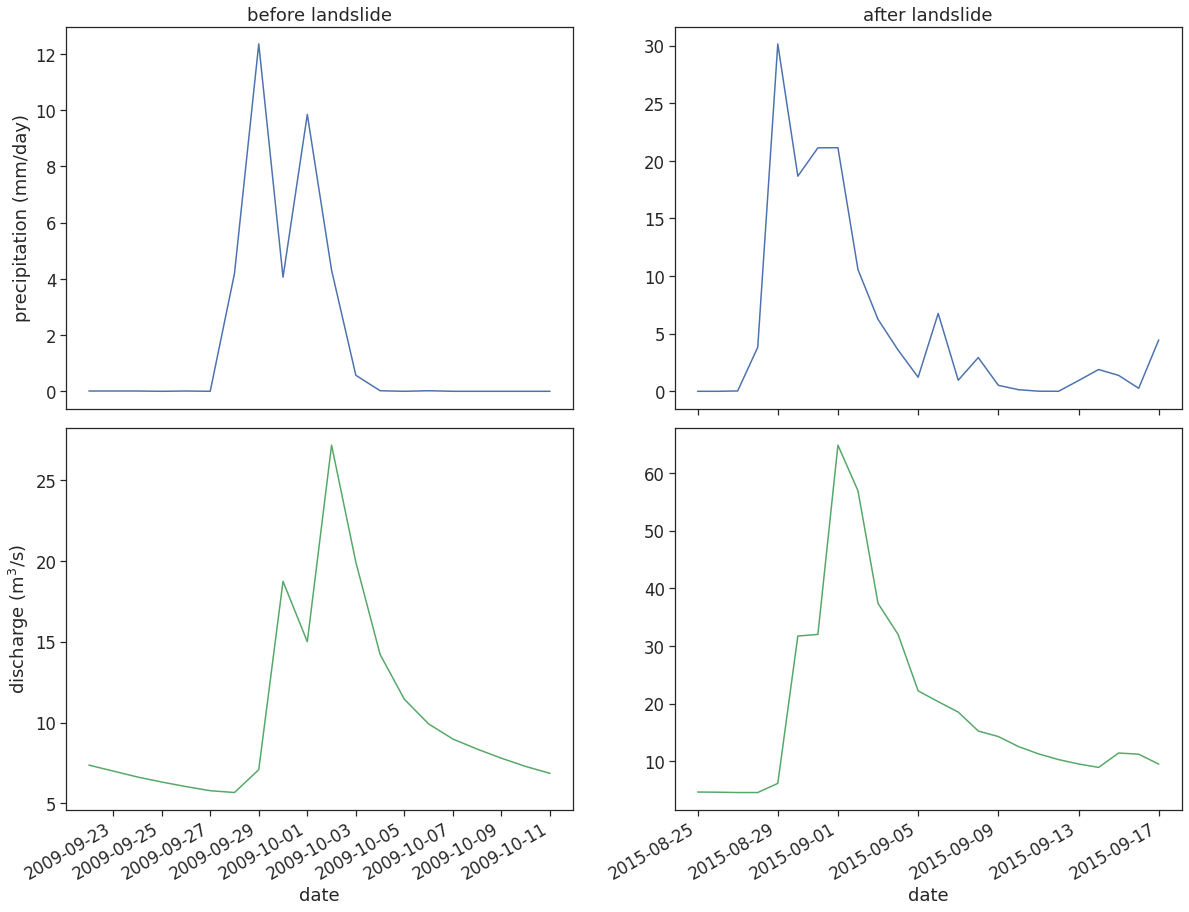

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20,16))
fig.subplots_adjust(hspace=0.05)
start_before='2009-09-22'
end_before='2009-10-11'
ax1.plot(oso_met_orginal['PRECTOTCORR'][start_before:end_before])# our time intervals is 15 min
ax3.plot(oso_dis['discharge'][start_before:end_before], color="g")

ax2.plot(oso_met_orginal['PRECTOTCORR']['2015-08-25':'2015-09-17'])# our time intervals is 15 min
ax4.plot(oso_dis['discharge']['2015-08-25':'2015-09-17'], color="g")
plt.gcf().autofmt_xdate() 
ax1.set(xticks=[],
        ylabel=r"precipitation (mm/day)",
        title='before landslide')
ax3.set(xlabel="date",
        ylabel=r"discharge (m$^3$/s)")
ax2.set(title='after landslide')
ax4.set(xlabel='date')

In [ ]:

area = 262 * 2589988.10  # squared miles to squared meters
start_before='2009-09-25'
end_before='2009-10-11'
df_p_before = oso_met_orginal['PRECTOTCORR'][start_before:end_before].to_frame()
df_q_before = oso_dis['discharge'][start_before:end_before].to_frame()

df_p_before['PRECTOTCORR'] = df_p_before['PRECTOTCORR'] * area / 1000  # mm to m3 in the whole watershed
df_p_before['PRECTOTCORR'] = df_p_before['PRECTOTCORR'] /60/60/24 # convert m3 per day to m3/s
P_before = df_p_before['PRECTOTCORR'].sum()*60*60*24
Q_before = df_q_before['discharge'].sum()*60*60*24

start_after='2015-08-25'
end_after='2015-09-17'
df_p_after = oso_met_orginal['PRECTOTCORR'][start_after:end_after].to_frame()
df_q_after = oso_dis['discharge'][start_after:end_after].to_frame()

df_p_after['PRECTOTCORR'] = df_p_after['PRECTOTCORR'] * area / 1000  # mm to m3 in the whole watershed
df_p_after['PRECTOTCORR'] = df_p_after['PRECTOTCORR'] /60/60/24 # convert m3 per day to m3/s
P_after = df_p_after['PRECTOTCORR'].sum()*60*60*24
Q_after = df_q_after['discharge'].sum()*60*60*24



soil moisture  on 2009-09-28=0.46
soil moisture  on 2015-08-29=0.58


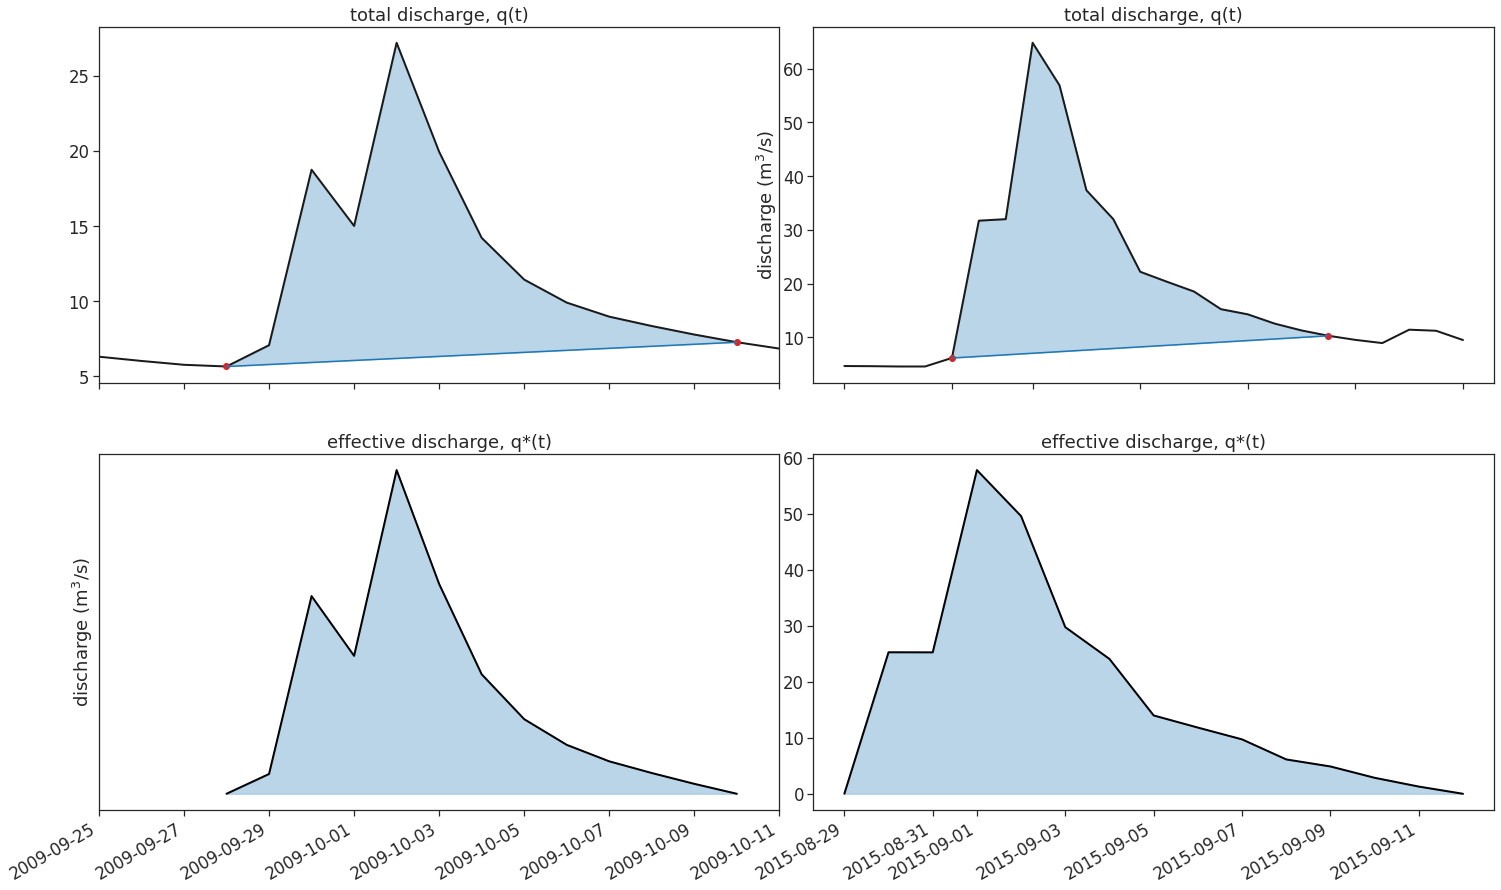

In [ ]:
from matplotlib.dates import HourLocator, DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ((ax1,ax3 ),(ax2, ax4)) = plt.subplots(2, 2, figsize=(25,16))
fig.subplots_adjust(wspace=0.05)

start_before='2009-09-28'
end_before='2009-10-10'
ax1.plot(df_q_before['discharge'], color="k", lw=2)
point1 = pd.to_datetime(start_before)
point2 = pd.to_datetime(end_before)
two_points_before = df_q_before.loc[[point1, point2]]['discharge']
ax1.plot(two_points_before, 'o', color="tab:red")

new = pd.DataFrame(data=two_points_before, index=two_points_before.index)

df_linear = (new.resample("1d") #resample
                .interpolate(method='time') #interpolate by time
            )

ax1.plot(df_linear, color="tab:blue")


df_between_2_points = df_q_before.loc[df_linear.index]


ax1.fill_between(df_between_2_points.index, df_between_2_points['discharge'],
                 y2=df_linear['discharge'],
                 color="tab:blue", alpha=0.3)

qstar_before = df_q_before.loc[df_linear.index]['discharge'] - df_linear['discharge']
Qstar_before = qstar_before.sum() *60*60*24

ax2.plot(qstar_before, color="black", lw=2)
ax2.fill_between(qstar_before.index, qstar_before,
                 y2=0.0,
                 color="tab:blue", alpha=0.3)






start_after='2015-08-29'
end_after='2015-09-12'
ax3.plot(df_q_after['discharge'], color="k", lw=2)
point1 = pd.to_datetime(start_after)
point2 = pd.to_datetime(end_after)
two_points_after = df_q_after.loc[[point1, point2]]['discharge']
ax3.plot(two_points_after, 'o', color="tab:red")

new = pd.DataFrame(data=two_points_after, index=two_points_after.index)

df_linear = (new.resample("1d") #resample
                .interpolate(method='time') #interpolate by time
            )

ax3.plot(df_linear, color="tab:blue")


df_between_2_points = df_q_after.loc[df_linear.index]


ax3.fill_between(df_between_2_points.index, df_between_2_points['discharge'],
                 y2=df_linear['discharge'],
                 color="tab:blue", alpha=0.3)

qstar_after = df_q_after.loc[df_linear.index]['discharge'] - df_linear['discharge']
Qstar_after = qstar_after.sum() *60*60*24

ax4.plot(qstar_after, color="black", lw=2)
ax4.fill_between(qstar_after.index, qstar_after,
                 y2=0.0,
                 color="tab:blue", alpha=0.3)








ax1.set(xlim=[df_q_before.index[0],
              df_q_before.index[-1]],
        
        
        title="total discharge, q(t)")
ax2.set(yticks=[],
        ylabel=r"discharge (m$^3$/s)",        
        xlim=[df_q_before.index[0],
              df_q_before.index[-1]],
        title="effective discharge, q*(t)"
       )

ax3.set(     
        ylabel=r"discharge (m$^3$/s)",
        title="total discharge, q(t)")
ax4.set(title="effective discharge, q*(t)",)
plt.gcf().autofmt_xdate()  # makes slated dates
soil_before_start=oso_met['GWETTOP'][start_before]
soil_after_start=oso_met['GWETTOP'][start_after]

print(f'soil moisture  on {start_before}={soil_before_start}')
print(f'soil moisture  on {start_after}={soil_after_start}')


In [ ]:
ratio_before = Qstar_before/ P_before
pstar_before = df_p_before['PRECTOTCORR'] * ratio_before
Pstar_before = pstar_before.sum() * 60 * 60*24
print(f"before landslide: Qstar / P = {ratio_before:.3f}")
ratio_after = Qstar_after/ P_after
pstar_after = df_p_after['PRECTOTCORR'] * ratio_after
Pstar_after = pstar_after.sum() * 60 * 60*24
print(f"After landslide: Qstar / P = {ratio_after:.3f}")

before landslide: Qstar / P = 0.279
After landslide: Qstar / P = 0.244


In [ ]:
def times_of_event(pstar,qstar):
    # pstar centroid
    # time of the first (nonzero) rainfall data point
    t0 = pstar[pstar != 0.0].index[0]
    # time of the last (nonzero) rainfall data point
    tf = pstar[pstar != 0.0].index[-1]
    # duration of the rainfall event, in minutes
    td = (tf-t0) / pd.Timedelta('24h')
    # make time array, add 2.5 minutes (half of dt)
    time = np.arange(0, td+1, 1) + 0.5
    # create pi array, only with relevant data (during rainfall duration)
    pi = pstar.loc[(pstar.index >= t0) & (pstar.index <= tf)]
    # convert from m3/5min to m3/s
    pi = pi.values * 60 * 15
    # time of precipitation centroid
    t_pc = (pi * time).sum() / pi.sum()
    # add initial time
    t_pc = t0 + pd.Timedelta(minutes=t_pc)

    # qstar centroid
    # time of the first (nonzero) discharge data point
    t0 = qstar[qstar != 0.0].index[0]
    # time of the last (nonzero) discharge data point
    tf = qstar[qstar != 0.0].index[-1]
    # duration of the discharge event, in minutes
    td = (tf-t0) / pd.Timedelta('24h')
    # make time array, add 7.5 minutes (half of dt)
    time = np.arange(0, td+1, 1) + 0.5
    # create qi array, only with relevant data (during discharge duration)
    qi = qstar.loc[(qstar.index >= t0) & (qstar.index <= tf)]

    qi = qi.values
    # time of discharge centroid
    t_qc = (qi * time).sum() / qi.sum()
    # add initial time
    t_qc = t0 + pd.Timedelta(minutes=t_qc)
    t_qc

    # time of peak discharge
    max_discharge = qstar.max()
    t_pk = qstar[qstar == max_discharge].index[0]

    # centroid lag
    T_LC = t_qc - t_pc

    # centroid lag-to-peak
    T_LPC = t_pk - t_pc

    # time of concentration
    T_c = T_LPC / 0.60
    return t_pc,t_qc,t_pk
t_pc_before,t_qc_before,t_pk_before=times_of_event(pstar_before,qstar_before)
t_pc_after,t_qc_after,t_pk_after=times_of_event(pstar_after,qstar_after)
def print_times(t_pc,t_qc,t_pk):
  # centroid lag
  T_LC = t_qc - t_pc

  # centroid lag-to-peak
  T_LPC = t_pk - t_pc

  # time of concentration
  T_c = T_LPC / 0.60
  print(f"T_LC = {T_LC}")
  print(f"T_LPC = {T_LPC}")
  print(f"T_c = {T_c}")
print('\ntime of water shed reaction before landslide\n')
print_times(t_pc_before,t_qc_before,t_pk_before)

print('\ntime of water shed reaction after landslide\n')
print_times(t_pc_after,t_qc_after,t_pk_after)


time of water shed reaction before landslide

T_LC = 2 days 23:59:32.405447
T_LPC = 5 days 23:55:30.678158
T_c = 9 days 23:52:31.130263333

time of water shed reaction after landslide

T_LC = 2 days 23:58:00.518932
T_LPC = 4 days 23:53:59.201638
T_c = 8 days 07:49:58.669396666


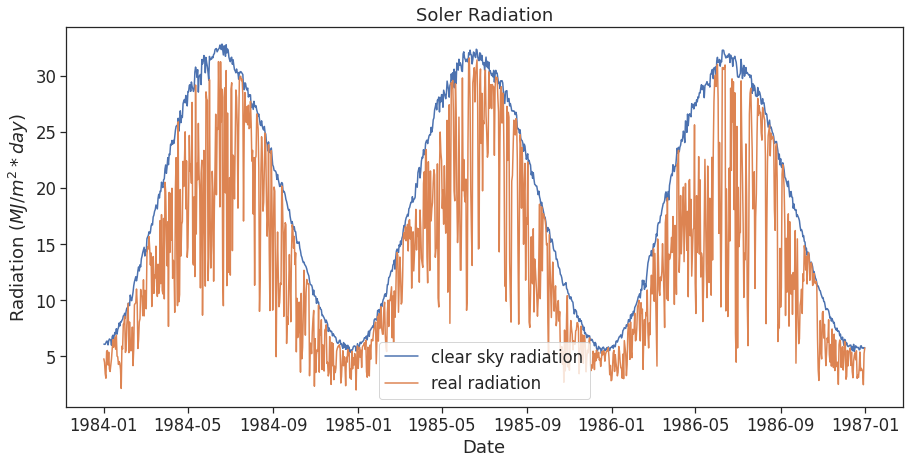

In [ ]:
fig, (ax) = plt.subplots(1, figsize=(15,7))
oso_met_monthly=oso_met.resample
ax.plot(oso_met['CLRSKY_SFC_SW_DWN']['1984':'1986'],label='clear sky radiation')
ax.plot(oso_met['ALLSKY_SFC_SW_DWN']['1984':'1986'],label='real radiation')
ax.set(title='Soler Radiation', ylabel='Radiation ($MJ/m^2*day$)',xlabel='Date')
ax.legend()


In [ ]:
for i in met_units:
  print (i)
df_pen = oso_met['T2M'].to_frame()# c
df_pen['u'] = oso_met['WS2M']#m/s
df_pen['P'] = oso_met['PS']#kpa
df_pen['RH'] = oso_met['RH2M']#%
df_pen['Rs'] = oso_met['ALLSKY_SFC_SW_DWN']
df_pen['Rso']=oso_met['CLRSKY_SFC_SW_DWN']
df_pen.rename(columns = {'T2M' : 'T'}, inplace = True)
df_pen=df_pen.loc['1984':]
df_pen

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Daily Data 
Dates (month/day/year): 01/01/1982 through 03/31/2021 
Location: Latitude  48.2827   Longitude -121.7148 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 671.57 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
GWETTOP               MERRA-2 Surface Soil Wetness (1) 
GWETROOT              MERRA-2 Root Zone Soil Wetness (1) 
GWETPROF              MERRA-2 Profile Soil Moisture (1) 
PS                    MERRA-2 Surface Pressure (kPa) 
WS2M                  MERRA-2 Wind Speed at 2 Meters (m/s) 
WS2M_MAX              MERRA-2 Wind Speed at 2 Meters Maximum (m/s) 
WS2M_MIN              MERRA-2 Wind Speed at 2 Meters Minimum (m/s) 
PRECTOTCORR           MERRA-2 Precipitation Corrected (mm/day) 
RH2M                  MERRA-2 Relative Humidity at 2 Meters (%) 
QV2M                  MERRA-2 Specific Humidity at 2 Meters (

,T,u,P,RH,Rs,Rso
DATE,,,,,,
1984-01-01,0.07,0.09,94.96,97.44,4.78,6.09
1984-01-02,1.97,0.09,94.66,99.88,4.46,6.07
1984-01-03,5.24,0.01,94.12,100.00,3.45,6.08
1984-01-04,7.30,0.18,94.27,99.50,3.05,6.21
1984-01-05,3.56,0.50,94.41,91.31,5.44,6.35
...,...,...,...,...,...,...
2021-03-27,3.85,0.13,94.58,95.44,14.97,20.09
2021-03-28,1.58,0.00,93.26,95.75,8.03,21.08
2021-03-29,-0.05,0.18,94.37,84.38,13.73,22.17


In [ ]:
def lambda_latent_heat(T):
    """daily latent heat of vaporization (MJ/kg)"""
    return 2.501 - 2.361e-3*T

def Delta(T):
    """slope of saturation-vapor curve (kPa/°C)"""
    return 0.2000*(0.00738*T + 0.8072)**7 - 0.000116

def G(T):
    """heat flux density to the ground, G (MJ/m2/d)"""
    return 4.2*np.gradient(T.values)

def emissivity(df_pen):
  return -0.02 + 0.261 * np.exp(-7.77e-4 * df_pen['T']**2)

def Rbo(df_pen):# Rbo: net longwave radiation for clear skies
  sigma = 4.903e-9# Stefan-Boltzmann constant
  return emissivity(df_pen)*sigma*((df_pen['T']+273.15)**4)
# net outgoing long-wave radiation (note: Rs/Rso = proportion of how clear the day is)
def Rb(a,b,df_pen):
  return(a*df_pen['Rs']/df_pen['Rso'] + b)*Rbo(df_pen)  
# vapor pressure deficit = VPD
def vp_sat(T):
    return np.exp((16.78*T - 116.9)/(T + 237.3)) 

df_pen['es'] = vp_sat(df_pen['T'])
df_pen['ed'] = df_pen['es'] * df_pen['RH'] / 100
df_pen['VPD'] = df_pen['es'] - df_pen['ed']

# α is the albedo, or short-wave reflectance (dimensionless)
alpha = 0.23# albedo for green vegetation
# net radiation
Rn = (1 - alpha) * df_pen['Rs'] - Rb(1,0,df_pen)# (MJ/m2/d)
df_pen['Rn'] = Rn

cp = 0.001013  # (MJ kg−1 °C−1) 
df_pen['lambda'] = lambda_latent_heat(df_pen['T'])
df_pen['Delta'] = Delta(df_pen['T'])
df_pen['G'] = G(df_pen['T'])
df_pen['gamma'] = (cp*df_pen['P'])/(0.622*df_pen['lambda'])
df_pen['f_wind'] = 1.0 + 0.53 * df_pen['u']
df_pen



,T,u,P,RH,Rs,Rso,es,ed,VPD,Rn,lambda,Delta,G,gamma,f_wind
DATE,,,,,,,,,,,,,,,
1984-01-01,0.07,0.09,94.96,97.44,4.78,6.09,0.614140,0.598418,0.015722,-1.487581,2.500835,0.044742,7.980,0.061841,1.0477
1984-01-02,1.97,0.09,94.66,99.88,4.46,6.07,0.704397,0.703552,0.000845,-1.523672,2.496349,0.050486,10.857,0.061756,1.0477
1984-01-03,5.24,0.01,94.12,100.00,3.45,6.08,0.887403,0.887403,0.000000,-1.278689,2.488628,0.061851,11.193,0.061594,1.0053
1984-01-04,7.30,0.18,94.27,99.50,3.05,6.21,1.023134,1.018018,0.005116,-1.083917,2.483765,0.070080,-3.528,0.061813,1.0954
1984-01-05,3.56,0.50,94.41,91.31,5.44,6.35,0.788731,0.720191,0.068541,-1.682984,2.492595,0.055766,-7.938,0.061686,1.2650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,3.85,0.13,94.58,95.44,14.97,20.09,0.805039,0.768329,0.036710,6.407484,2.491910,0.056778,-3.003,0.061814,1.0689
2021-03-28,1.58,0.00,93.26,95.75,8.03,21.08,0.684970,0.655858,0.029111,3.624303,2.497270,0.049258,-8.190,0.060820,1.0000
2021-03-29,-0.05,0.18,94.37,84.38,13.73,22.17,0.608800,0.513705,0.095095,6.501395,2.501118,0.044399,0.042,0.061450,1.0954


In [ ]:
def remove_neg(x):#function that removes negetive values and replaces them with 0
  if x<0:
    x=0
  return x
def E_penman(df):
    T = df['T']
    Delta = df['Delta']
    gamma = df['gamma']
    Rn = df['Rn']
    G = df['G']
    EA = 6.43*df['f_wind'] * df['VPD']
    lambd = df['lambda']
    return ((Delta / (Delta + gamma))*(Rn - G) + ((gamma / (Delta + gamma))*EA)) / lambd

# daily_data
df_pen['E_penman'] = E_penman(df_pen)
df_pen['E_penman']=df_pen['E_penman'].apply(remove_neg)


In [ ]:
def th_Ep(df):
  # Preparing "I" for the Thornthwaite equation
  # monthly1=(df['T'].resample('MS')  # MS assigns mean to first day in the month
  #               .mean()
  #               .to_frame()
  #       )
  monthly=(df['T'].resample('Y')  # Y assigns mean to last day in the year
                .sum()
                .to_frame()
        )  
  monthly.loc['2021-12-31']=monthly.loc['2020-12-31']#since the last year is not a full year
  I = ( ((monthly['T'].mean())/5)**(1.514) )

  # Preparing "a" for the Thornthwaite equation
  a = (+6.75e-7 * I**3 
      -7.71e-5 * I**2
      +1.792e-2 * I
      + 0.49239)

  # The final Thornthwaite model for monthly potential ET (mm)
  df['th_Ep'] = 16*((10*df['T']/I)**a)
  return df
df_th=pd.DataFrame(df_pen['T'],columns=['T']).resample('MS').mean()
df_th['T']=df_th['T'].apply(remove_neg)
df_th=th_Ep(df_th)

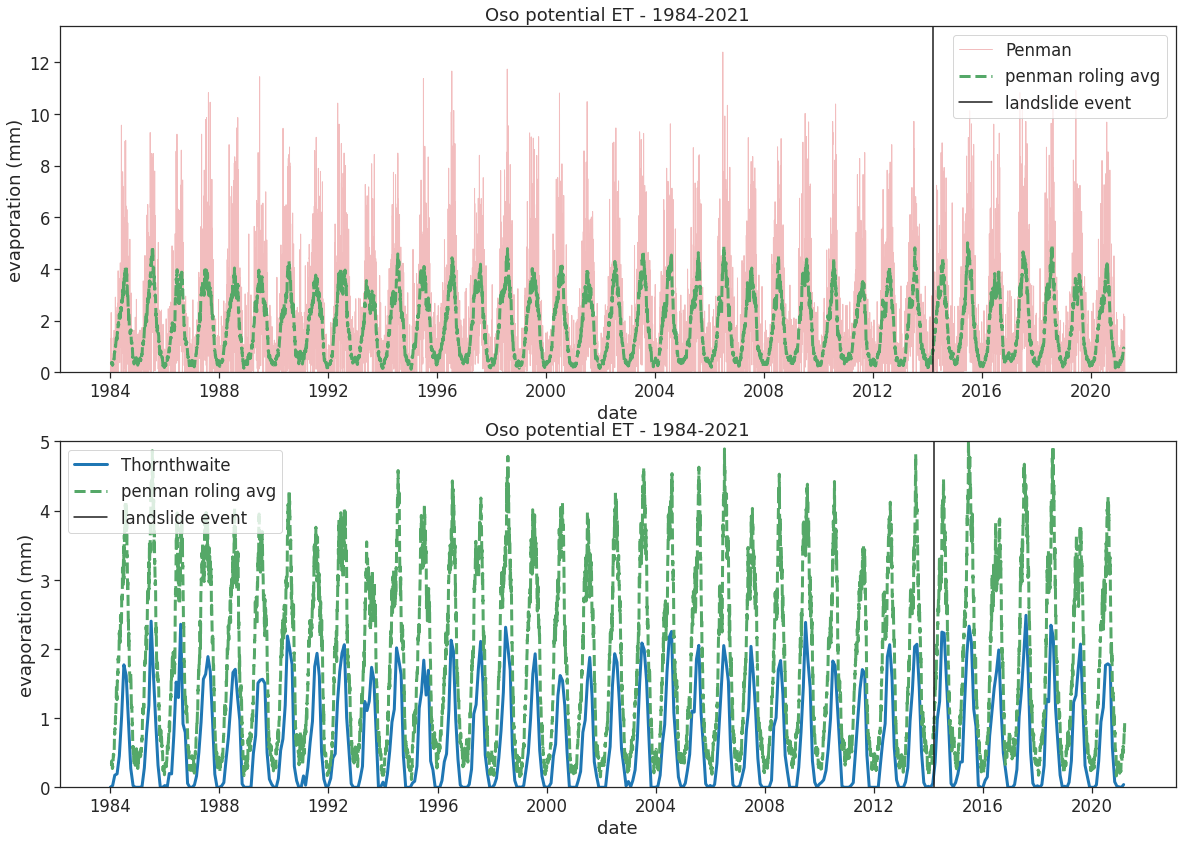

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,14))
start='1984'
end='2021'
ax1.plot(df_pen['E_penman'][start:end], color="tab:red",alpha=0.3, label="Penman", linewidth=1)
pen_roling_avg=df_pen['E_penman'][start:end].dropna()
pen_roling_avg=pen_roling_avg.rolling(30, center=True).mean()
penman_smooth= (df_pen['E_penman'].resample('M')
                               .mean()
              )
# ax1.plot(penman_smooth[start:end], label='penman month avg', color="black", linestyle="--", linewidth=3)
ax1.plot(pen_roling_avg, label='penman roling avg', color="g", linestyle="--", linewidth=3)

ax1.set(xlabel="date",
       ylabel="evaporation (mm)",
       title="Oso potential ET - 1984-2021",
        ylim=(0,df_pen['E_penman'].max()+1))


ax2.plot(df_th['th_Ep'][start:end]/30, color="tab:blue", label="Thornthwaite", linewidth=3) #we have to normalize the results of df_th
# ax2.plot(penman_smooth[start:end], label='penman smoothed', color="black", linestyle="--", linewidth=3)
ax2.plot(pen_roling_avg, label='penman roling avg', color="g", linestyle="--", linewidth=3)
ax2.set(xlabel="date",
       ylabel="evaporation (mm)",
       title="Oso potential ET - 1984-2021",
        ylim=(0,5))
ax2.axvline('2014-03-22',color='k',label='landslide event')
ax1.axvline('2014-03-22',color='k',label='landslide event')
ax2.legend()
ax1.legend()

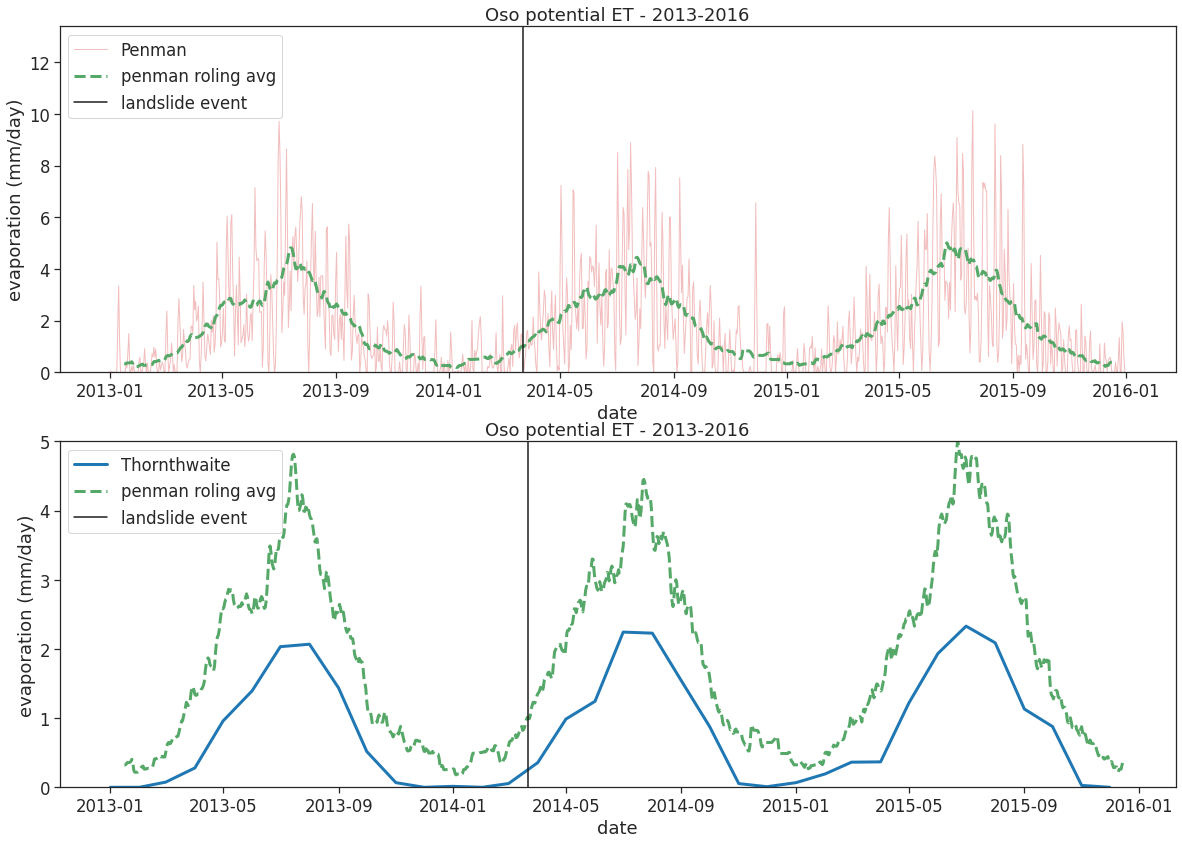

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,14))
start='2013'
end='2015'
ax1.plot(df_pen['E_penman'][start:end], color="tab:red",alpha=0.3, label="Penman", linewidth=1)
pen_roling_avg=df_pen['E_penman'][start:end].dropna()
pen_roling_avg=pen_roling_avg.rolling(30, center=True).mean()
penman_smooth= (df_pen['E_penman'].resample('M')
                               .mean()
              )
# ax1.plot(penman_smooth[start:end], label='penman month avg', color="black", linestyle="--", linewidth=3)
ax1.plot(pen_roling_avg, label='penman roling avg', color="g", linestyle="--", linewidth=3)

ax1.set(xlabel="date",
       ylabel="evaporation (mm/day)",
       title="Oso potential ET - 2013-2016",
        ylim=(0,df_pen['E_penman'].max()+1))


ax2.plot(df_th['th_Ep'][start:end]/30, color="tab:blue", label="Thornthwaite", linewidth=3) #we have to normalize the results of df_th
# ax2.plot(penman_smooth[start:end], label='penman smoothed', color="black", linestyle="--", linewidth=3)
ax2.plot(pen_roling_avg, label='penman roling avg', color="g", linestyle="--", linewidth=3)
ax2.set(xlabel="date",
       ylabel="evaporation (mm/day)",
       title="Oso potential ET - 2013-2016",
        ylim=(0,5))
ax2.axvline('2014-03-22',color='k',label='landslide event')
ax1.axvline('2014-03-22',color='k',label='landslide event')
ax2.legend()
ax1.legend()

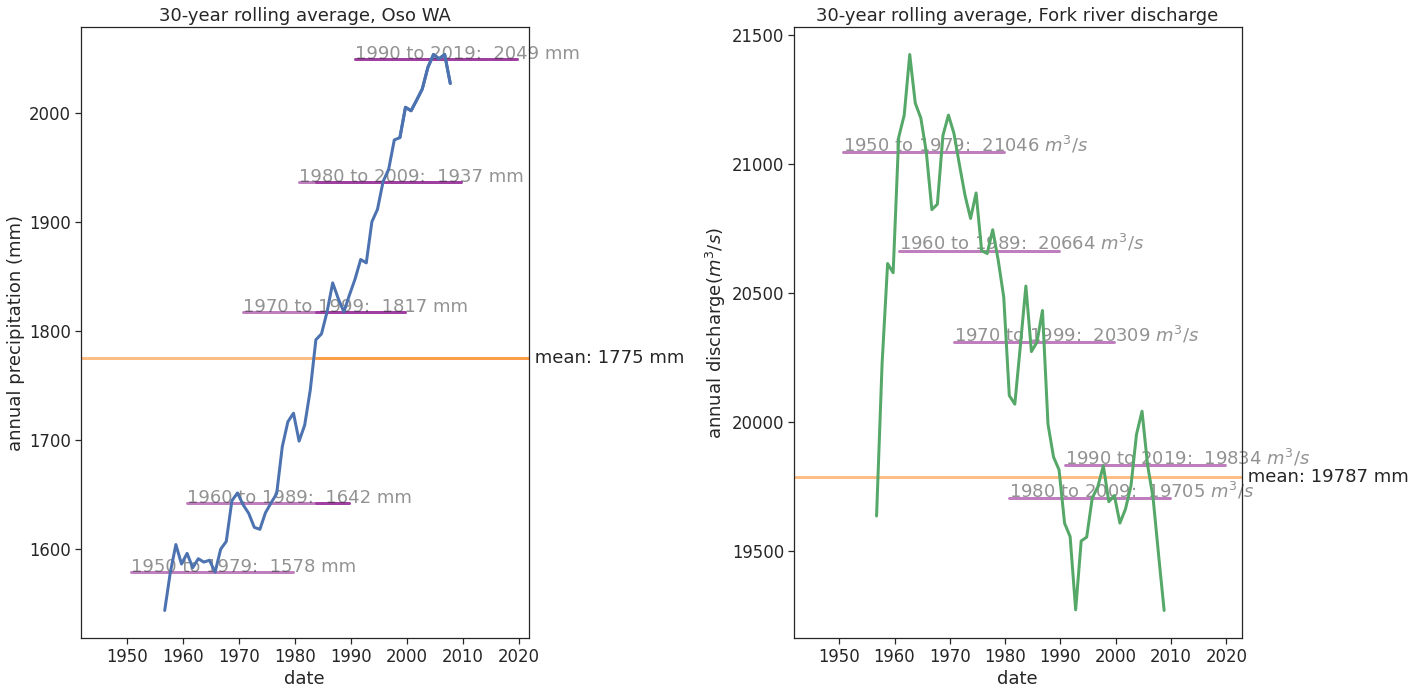

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
df_year=pd.concat((oso_per['PRCP']['1940-10-01':'1983'].resample('A-SEP').sum().to_frame(),oso_met_orginal['PRECTOTCORR']['1983':].resample('A-SEP').sum().to_frame()), axis=1)
df_year['PRCP']['1983':]=df_year['PRECTOTCORR']['1983':]
rolling_mean = df_year.rolling(30, center=True).mean()
ax1.plot(rolling_mean, linewidth=3, color="b", zorder=5)
df_year_snow = oso_dis['discharge']['1940-10-01':].resample('A-SEP').sum().to_frame()

ax1.set_title("30-year rolling average, Oso WA")
ax1.set_xlabel("date")
ax1.set_ylabel("annual precipitation (mm)")

# windows of length 30 years
windows = [[x,x+29] for x in [1950,1960,1970,1980,1990]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year['PRCP'][start_date:end_date].mean()
    ax1.plot(df_year[start_date:end_date]*0+window_mean, color="purple", linewidth=3, alpha=0.5)
    ax1.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm", alpha=0.5)
#ax.set_ylim([480, 560])

# plot mean
rain_mean=df_year['PRCP'].mean()
ax1.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax1.text(df_year.index[-1], rain_mean, f" mean: {rain_mean:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")
ax1.set_xlim([df_year.index[0], df_year.index[-1]])





rolling_mean = df_year_snow.rolling(30, center=True).mean()

ax2.plot(rolling_mean, linewidth=3, color="g", zorder=5)

ax2.set_title("30-year rolling average, Fork river discharge")
ax2.set_xlabel("date")
ax2.set_ylabel("annual discharge($m^3/s$)")
# windows of length 30 years
windows = [[x,x+29] for x in [1950,1960,1970,1980,1990]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year_snow['discharge'][start_date:end_date].mean()
    ax2.plot(df_year_snow[start_date:end_date]*0+window_mean, color="purple", linewidth=3, alpha=0.5)
    ax2.text(start_date, window_mean+5, f"{window[0]} to {window[1]}:  {window_mean:.0f} $m^3/s$", alpha=0.5)
#ax.set_ylim([480, 560])

# plot mean
snow_mean=df_year_snow['discharge'].mean()
ax2.plot(df_year_snow*0 + snow_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax2.text(df_year_snow.index[-1], snow_mean, f" mean: {snow_mean:.0f} mm".format(snow_mean),
        horizontalalignment="left", verticalalignment="center")
ax2.set_xlim([df_year_snow.index[0], df_year_snow.index[-1]])
fig.tight_layout()


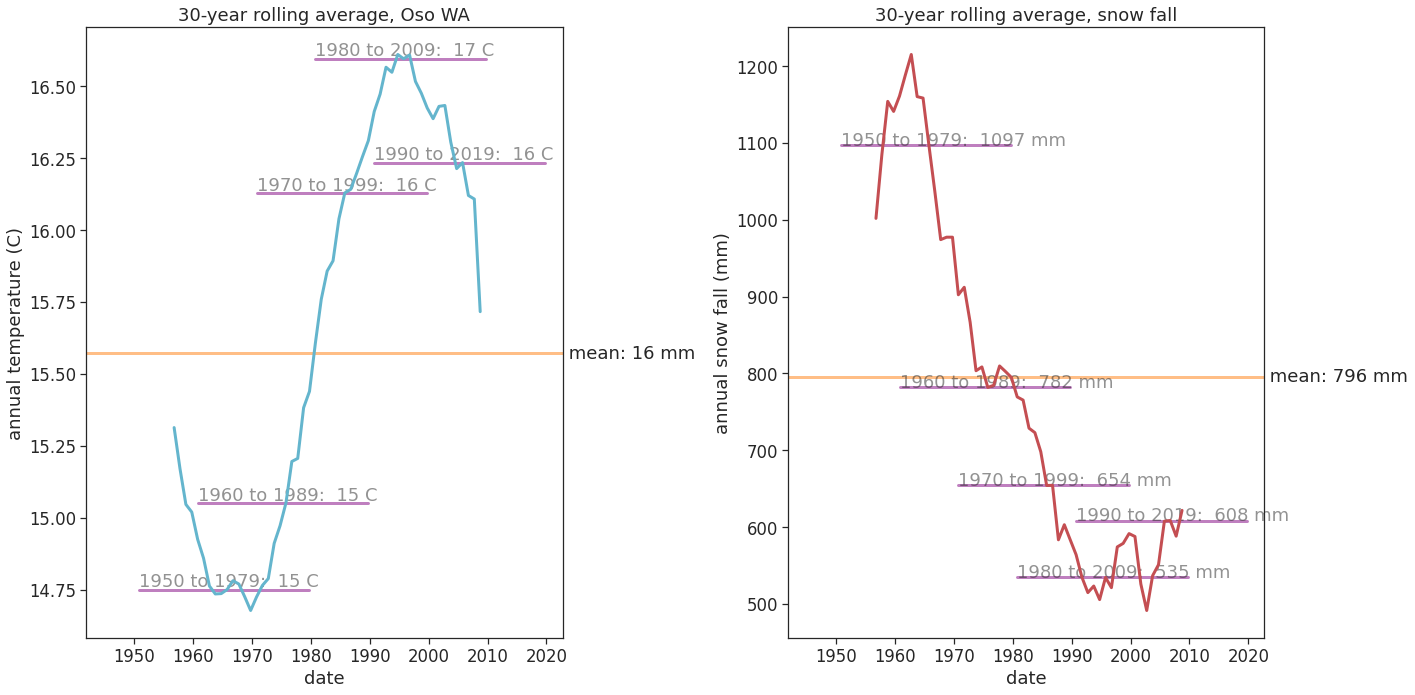

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

df_year = oso_per['TMAX']['1940-10-01':].resample('A-SEP').mean().to_frame()/10
df_year_snow = oso_per['SNOW']['1940-10-01':].resample('A-SEP').sum().to_frame()
rolling_mean = df_year.rolling(30, center=True).mean()
ax1.plot(rolling_mean, linewidth=3, color="c", zorder=5)

ax1.set_title("30-year rolling average, Oso WA")
ax1.set_xlabel("date")
ax1.set_ylabel("annual temperature (C)")

# windows of length 30 years
windows = [[x,x+29] for x in [1950,1960,1970,1980,1990]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year['TMAX'][start_date:end_date].mean()
    ax1.plot(df_year[start_date:end_date]*0+window_mean, color="purple", linewidth=3, alpha=0.5)
    ax1.text(start_date, window_mean+0.01, f"{window[0]} to {window[1]}:  {window_mean:.0f} C", alpha=0.5)
#ax.set_ylim([480, 560])

# plot mean
rain_mean=df_year['TMAX'].mean()
ax1.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax1.text(df_year.index[-1], rain_mean, f" mean: {rain_mean:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")
ax1.set_xlim([df_year.index[0], df_year.index[-1]])





rolling_mean = df_year_snow.rolling(30, center=True).mean()
ax2.plot(rolling_mean, linewidth=3, color="r", zorder=5)

ax2.set_title("30-year rolling average, snow fall")
ax2.set_xlabel("date")
ax2.set_ylabel("annual snow fall (mm)")
# windows of length 30 years

windows = [[x,x+29] for x in [1950,1960,1970,1980,1990]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year_snow['SNOW'][start_date:end_date].mean()
    ax2.plot(df_year_snow[start_date:end_date]*0+window_mean, color="purple", linewidth=3, alpha=0.5)
    ax2.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm", alpha=0.5)
#ax.set_ylim([480, 560])

# plot mean
snow_mean=df_year_snow['SNOW'].mean()
ax2.plot(df_year_snow*0 + snow_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax2.text(df_year_snow.index[-1], snow_mean, f" mean: {snow_mean:.0f} mm".format(snow_mean),
        horizontalalignment="left", verticalalignment="center")
ax2.set_xlim([df_year_snow.index[0], df_year_snow.index[-1]])
fig.tight_layout()


In [ ]:
# coordination of points on the curve (2014,2016)
def y_coor(df_Q,df_P): # assuming actual ET = precipition - effective discharge
    Qstar = df_Q['discharge'] - df_Q['discharge'].min() # monthly Q*
    Qstar_annual = float(Qstar.sum()) # annual Q*
    P_annual = float(df_P['PRECTOTCORR'].sum()*292 * 2589988.10/(1000*24*60*60)) # sum P annual and unit conversion from mm/day to m^3/s
    return((P_annual-Qstar_annual)/P_annual) # ET = P_annual - Qstar_annual
def x_coor(df_P,df_ET):
    P_annual = float(df_P['PRECTOTCORR'].resample('A-SEP').sum()) # sum P annual
    ET0 = float(df_ET['E_penman'].resample('A-SEP').sum()) # penman's potantial ET
    return(ET0/P_annual)#no need for unit convesion since ET and precipitation are both mm/day

    # # base volume - under the assumption that it is equal to the minimum monthly volume for neutral year 2014
    # Q_star = df_Q['monthly discharge (MCM)'] - Q_base 
    # ratio = Q_star / df_P['monthly precipitation (MCM)']
years=np.arange(1984,2020)
y_budyko={}
x_budyko={}
for i in years:
  
  start_date = f"{i:d}-10-01"
  end_date = f"{i+1:d}-09-30"
  y_budyko[start_date]=y_coor(oso_dis.loc[start_date:end_date].resample('MS').sum(),oso_met.loc[start_date:end_date].resample('MS').sum())
  x_budyko[start_date]=x_coor(oso_met.loc[start_date:end_date].resample('MS').sum(),df_pen.loc[start_date:end_date].resample('MS').sum())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


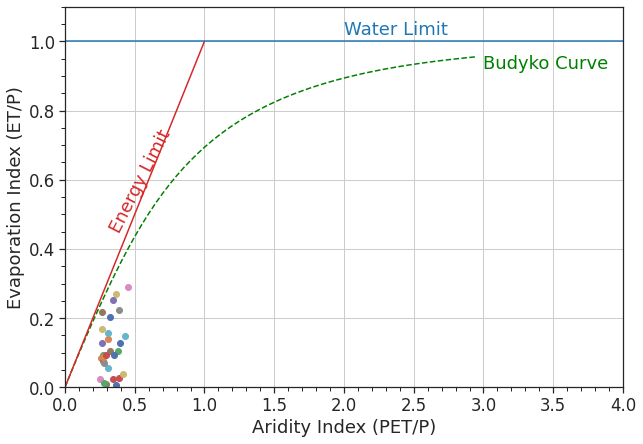

In [ ]:

# creating budyko curve
fig_budyko,(ax_budyko) = plt.subplots(1,1,figsize=(10,7))


x = np.arange(0, 1.0005, 0.05)
y = 1 + x*0
# budyko curve plot
budyko_curve_x = np.arange(0, 3, 0.05)
budyko_curve_y = np.power((budyko_curve_x*np.tanh(1/budyko_curve_x)*(1-np.exp(-budyko_curve_x))),0.5)
budyko_curve = pd.DataFrame(data=budyko_curve_y, index=budyko_curve_x)
ax_budyko.plot(budyko_curve,'--',color="green",linewidth=1.5, label = 'Budyko Curve')

# energy limit curve
energy_limit_x = np.arange(0, 1.0001, 0.05)
energy_limit_y = energy_limit_x
energy_limit = pd.DataFrame(data=energy_limit_y, index=energy_limit_x)
ax_budyko.plot(energy_limit,'-',color="tab:red",linewidth=1.5, label = 'Energy Limit')

# water limit curve
water_limit_y = 1+budyko_curve_x*0
ax_budyko.plot(water_limit_y,'-',color="tab:blue",linewidth=1.5, label = 'Water Limit')

ax_budyko.grid()
ax_budyko.set_ylim(0,1.1,0.2)
ax_budyko.set_xlim(0,3,0.5)
ax_budyko.set(xlabel="Aridity Index (PET/P)",
       ylabel="Evaporation Index (ET/P)",
       xlim=[0, 4],
       ylim=[0, 1.1])

ax_budyko.text(2, 1.02, "Water Limit", color="tab:blue")
ax_budyko.text(0.3, 0.45, "Energy Limit", rotation=63, color="tab:red")
ax_budyko.text(3, 0.92, "Budyko Curve",color="green")

# coordination of points on the curve (2014,2016)
for i in years:
  start_date = f"{i:d}-10-01"

  ax_budyko.scatter(x_budyko[start_date],y_budyko[start_date],marker="o")
  # ax_budyko.text(x_budyko[start_date]-0.125,y_budyko[start_date]+0.05, str(i))


ax_budyko = plt.minorticks_on()

fig_budyko.savefig('budyko_curve.png', dpi=100)